# Predicting the Popularity of Mashable News Articles

### Importing Libraries

In [1]:
inp='abcd'
out='debabcd'



In [ ]:
aacecaa
aaacecaa

In [2]:
a=inp[0]
b=inp[1]
if a==b:
    a+inp
else:
    
    

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

### Importing the dataset

In [16]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### Target Variable

Shares column is taken as target variable.

### Shape of the Dataset

In [8]:
df.shape

(39644, 61)

* The dataset consist of 39644 Rows and 61 columns

### Renaming the column names

In [24]:
df.columns = df.columns.str.strip()

In [25]:
old_names = ['data_channel_is_lifestyle','data_channel_is_entertainment', 'data_channel_is_bus','data_channel_is_socmed', 
             'data_channel_is_tech','data_channel_is_world','weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday',
             'weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday']
new_names = ['lifestyle','entertainment','bus','socmed','tech','world','monday','tuesday','wednesday','thursday','friday',
             'saturday','sunday']
for i , j in zip(old_names , new_names):
    df = df.rename(columns= {i : j})

In [26]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'lifestyle', 'entertainment',
       'bus', 'socmed', 'tech', 'world', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'monday',
       'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday',
       'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polari

### Variables Data Types

In [12]:
df.dtypes

url                              object
timedelta                       float64
n_tokens_title                  float64
n_tokens_content                float64
n_unique_tokens                 float64
n_non_stop_words                float64
n_non_stop_unique_tokens        float64
num_hrefs                       float64
num_self_hrefs                  float64
num_imgs                        float64
num_videos                      float64
average_token_length            float64
num_keywords                    float64
lifestyle                       float64
entertainment                   float64
bus                             float64
socmed                          float64
tech                            float64
world                           float64
kw_min_min                      float64
kw_max_min                      float64
kw_avg_min                      float64
kw_min_max                      float64
kw_max_max                      float64
kw_avg_max                      float64


### Feature Engineering

In [13]:
df.drop(['url'],axis=1,inplace = True)

In [29]:
def is_weekday(row):
    if (row['saturday'] == 0) and (row['sunday'] == 0):
        return 1
    else:
        return 0

df['is_weekday'] = df.apply(is_weekday, axis=1)

In [31]:
df['is_weekday'].value_counts()

1    34454
0     5190
Name: is_weekday, dtype: int64

In [28]:
df['is_weekend'].value_counts()

0.0    34454
1.0     5190
Name: is_weekend, dtype: int64

In [32]:
df['categories']=df[['lifestyle','entertainment', 'bus','socmed', 'tech','world']].idxmax(axis=1)
df['days'] = df[['monday','tuesday','wednesday','thursday','friday','saturday','sunday']].idxmax(axis=1)

* Droping url vaiable as there is no scope of analysis.
* Adding a variable called is_weekday for further analysis.
* Decoding some encoded categorical columns and added as categories and days. 

In [33]:
df['categories']

0        entertainment
1                  bus
2                  bus
3        entertainment
4                 tech
             ...      
39639             tech
39640           socmed
39641        lifestyle
39642            world
39643    entertainment
Name: categories, Length: 39644, dtype: object

### Splitting numerical and categorical columns

#### Categorical variables

In [34]:
cat = ['lifestyle','entertainment', 'bus','socmed', 'tech','world','monday', 'tuesday','wednesday', 'thursday', 
             'friday','saturday', 'sunday', 'is_weekend','is_weekday' , 'categories','days']

In [35]:
len(cat)

17

In [40]:
df.dtypes

url                              object
timedelta                       float64
n_tokens_title                  float64
n_tokens_content                float64
n_unique_tokens                 float64
n_non_stop_words                float64
n_non_stop_unique_tokens        float64
num_hrefs                       float64
num_self_hrefs                  float64
num_imgs                        float64
num_videos                      float64
average_token_length            float64
num_keywords                    float64
lifestyle                       float64
entertainment                   float64
bus                             float64
socmed                          float64
tech                            float64
world                           float64
kw_min_min                      float64
kw_max_min                      float64
kw_avg_min                      float64
kw_min_max                      float64
kw_max_max                      float64
kw_avg_max                      float64


* The dataset consist of 17 categorical columns.

#### Numerical variables

In [13]:
num = df.drop(columns=['lifestyle','entertainment', 'bus','socmed', 'tech','world','monday', 'tuesday','wednesday', 'thursday', 
             'friday','saturday', 'sunday', 'is_weekend','is_weekday' , 'categories','days'],axis=1).columns

In [14]:
len(num)

46

* The dataset consist of 46 numerical variables.

### Dataset Summary

In [15]:
df.describe(include = object)

,categories,days
count,39644,39644
unique,6,7
top,world,wednesday
freq,8427,7435


* The dataset consist of 6 unique categories.
* The frequently used category is world.
* Many times the article is shared on wednesday.

In [16]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


* The count of all the variables is same thus no missing values is present.
* The range of variables n_tokens_content, n_unique_tokens n_non_stop_words ,n_non_stop_unique_tokens, num_hrefs, num_self_hrefs seems to be very large may be presence of outlies or extreme values is possible. 
* Some variables such as min_negative_polarity','global_sentiment_polarity','avg_negative_polarity', 'kw_min_min', 'wk_avg', 'kw_min_avg',  'max_negative_polarity', 'title_sentiment_polarity' having negative values as minimum so these variables are need to be analysed.
* Some variables n_tokens_content, n_unique_tokens n_non_stop_words ,n_non_stop_unique_tokens, num_hrefs, num_self_hrefs, num_imgs, num_videos, average_token_length having zero as there minimum these variables are also need to be analysed.

### Univariate Analysis

#### Categorical variables

<Axes: >

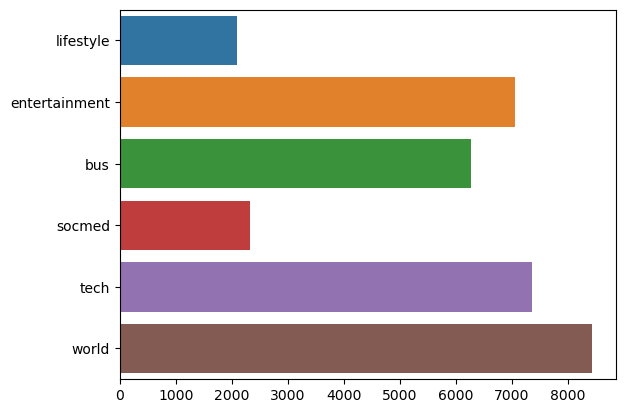

In [17]:
cols = ['lifestyle','entertainment', 'bus','socmed', 'tech','world']
total = [df[x].sum() for x in cols]
sns.barplot(x = total , y = cols)

* Maximum article are published about world.
* Equal amount of articles are published for entertainment and technology.
* Articles about Lifestyle is published less.

<Axes: >

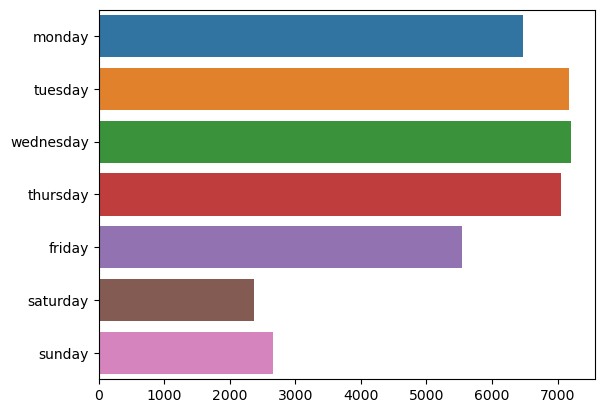

In [242]:
cols = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
total = [df[x].sum() for x in cols]
sns.barplot(x = total , y = cols)

* Many Articles are relesed on wednesday followed by Tuesday.
* The least amount of articles released on a weekday is on Friday.
* 50% of articles are only published in saturday and sunday.

#### Numerical Variables

##### Checking for outliers

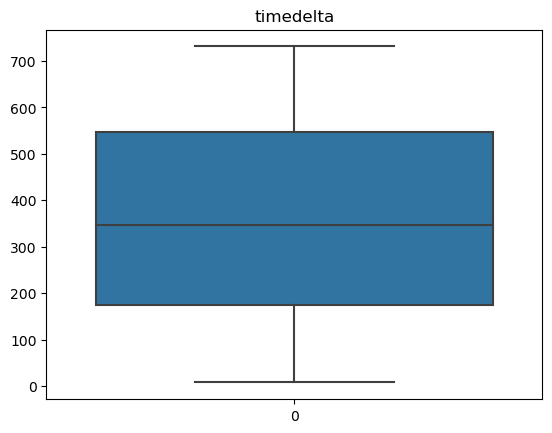

In [243]:
sns.boxplot(df['timedelta'])
plt.title('timedelta')    
plt.show()

* In the corresponding Box plot, there is no point outside the whisker thus there is no outliers in this variable .

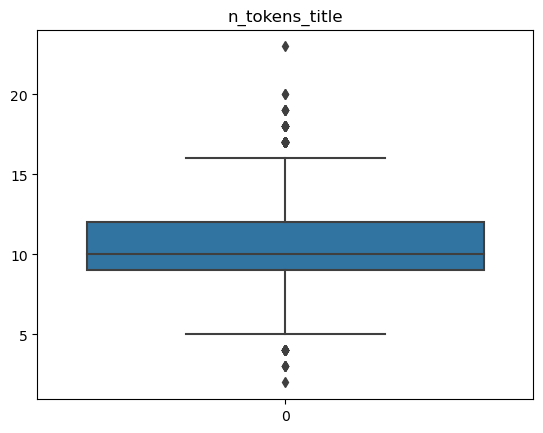

In [244]:
sns.boxplot(df['n_tokens_title'])
plt.title('n_tokens_title')
plt.show()

* In the corresponding box plot, the whiskers would typically extend to show the range of the data, and there are some points are outside the range of wisker thus it is considered as outliers.

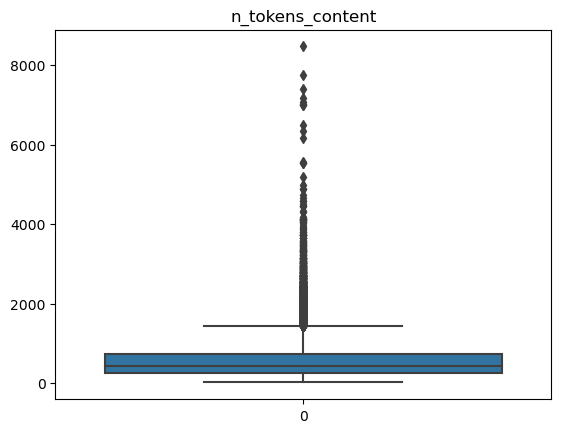

In [245]:
sns.boxplot(df['n_tokens_content'])
plt.title('n_tokens_content')
plt.show()

* In the corresponding box plot, the whiskers would typically extend to show the range of the data, and there are many points are outside the range of whisker thus it is considered as outliers.

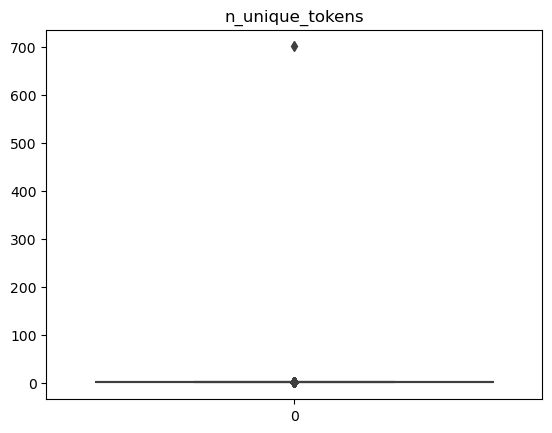

In [259]:
sns.boxplot(df['n_unique_tokens'])
plt.title('n_unique_tokens')
plt.show()

* In the corresponding boxplot, the range of whisker is between 0 to 1 and few point are way outside the range thus they are considered as outliers.

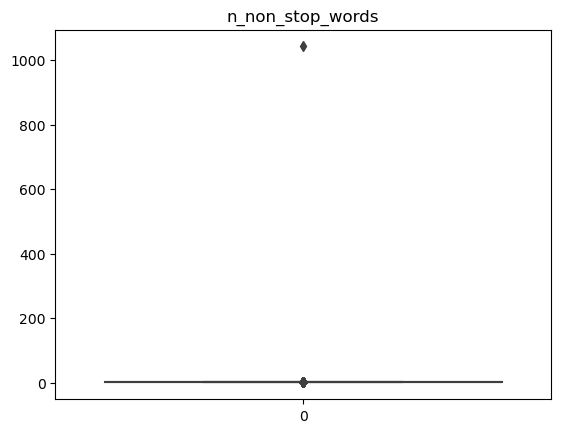

In [260]:
sns.boxplot(df['n_non_stop_words'])
plt.title('n_non_stop_words')
plt.show()

* In the corresponding boxplot, the range of whisker is between 0 to 1 and few point are way outside the range thus they are considered as outliers.

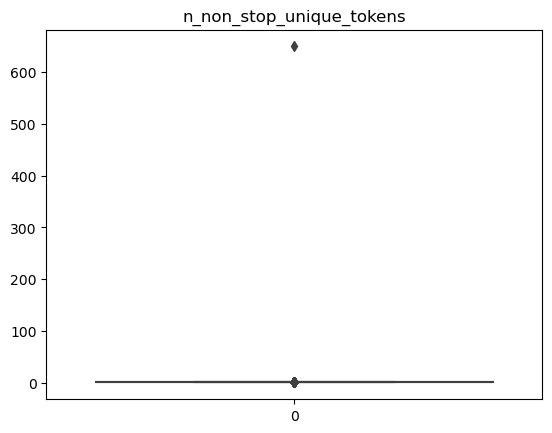

In [261]:
sns.boxplot(df['n_non_stop_unique_tokens'])
plt.title('n_non_stop_unique_tokens')
plt.show()

* In the corresponding boxplot, the range of whisker is between 0 to 1 and few point are way outside the range thus they are considered as outliers.

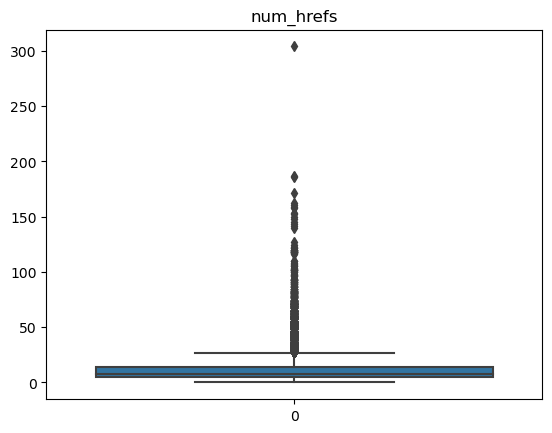

In [262]:
sns.boxplot(df['num_hrefs'])
plt.title('num_hrefs')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 10 and there are many points are outside the range of whisker thus it is considered as outliers.

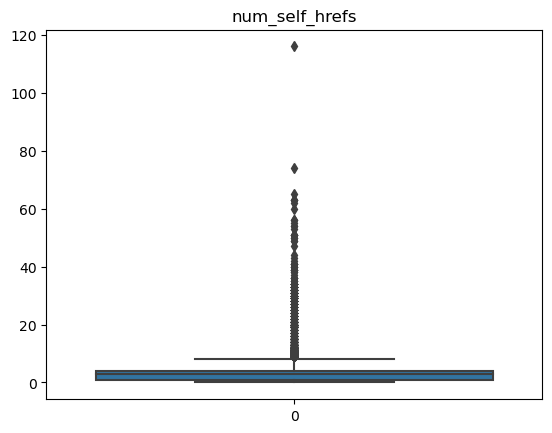

In [263]:
sns.boxplot(df['num_self_hrefs'])
plt.title('num_self_hrefs')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 7 and there are many points are outside the range of whisker thus it is considered as outliers.

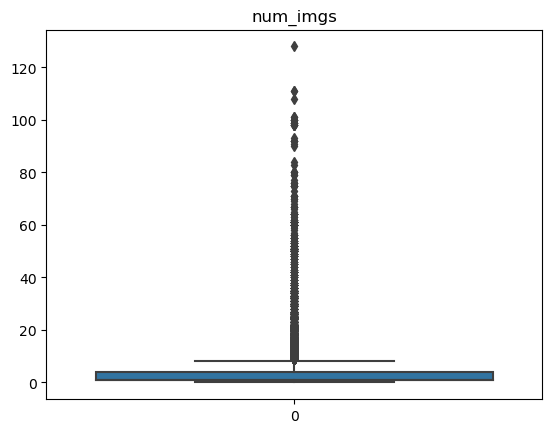

In [264]:
sns.boxplot(df['num_imgs'])
plt.title('num_imgs')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 7 and there are many points are outside the range of whisker thus it is considered as outliers.

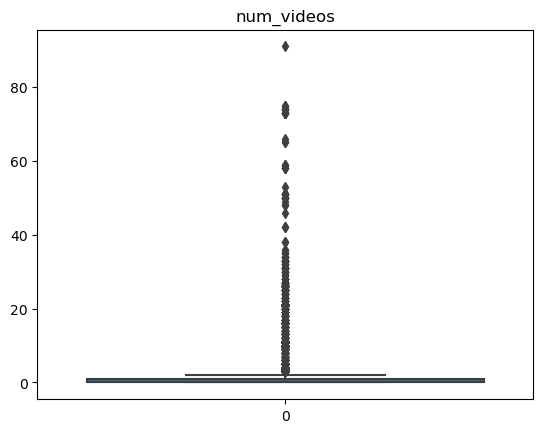

In [265]:
sns.boxplot(df['num_videos'])
plt.title('num_videos')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 5 and there are many points are outside the range of whisker thus it is considered as outliers.

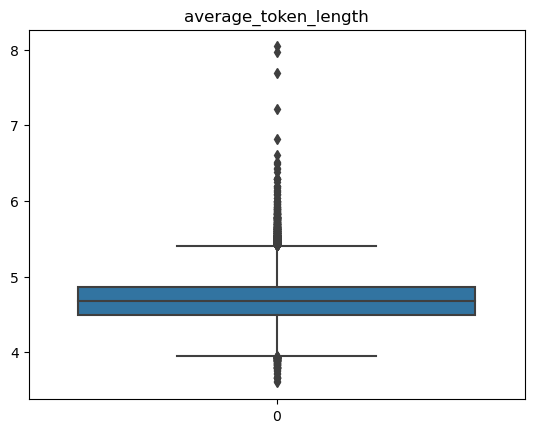

In [266]:
sns.boxplot(df['average_token_length'])
plt.title('average_token_length')
plt.show()

* In the corresponding box plot, the whisker ranges between 3 to 6 and there are many points are outside the ranges of both side of the whisker thus it is considered as outliers.

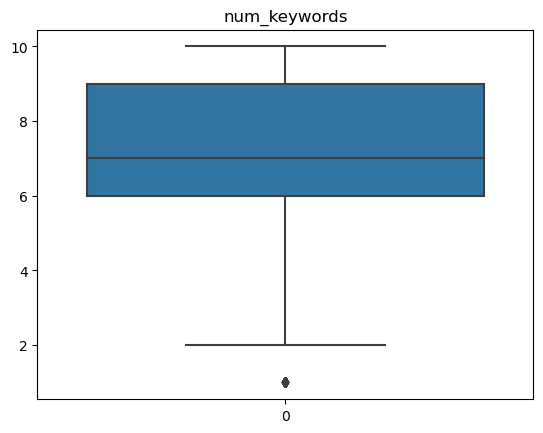

In [267]:
sns.boxplot(df['num_keywords'])
plt.title('num_keywords')
plt.show()

* In the corresponding box plot, the whisker ranges between 2 to 10 and there are few points are outside the ranges of lower side of the whisker thus it is considered as outliers.

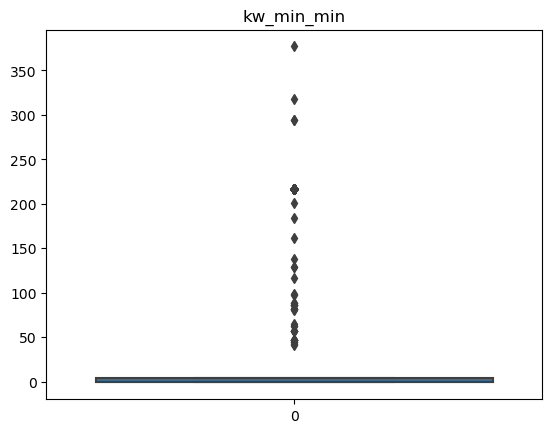

In [268]:
sns.boxplot(data=df['kw_min_min'])
plt.title('kw_min_min')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 10 and there are many points are outside the ranges of the whisker thus it is considered as outliers.

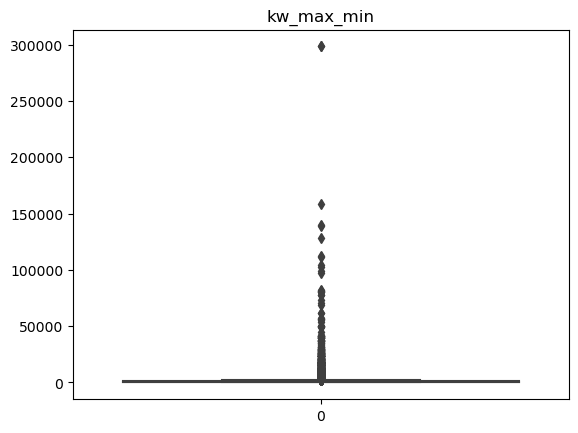

In [269]:
sns.boxplot(data=df['kw_max_min'])
plt.title('kw_max_min')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 1000 and there are many points are outside the ranges of the whisker thus it is considered as outliers.

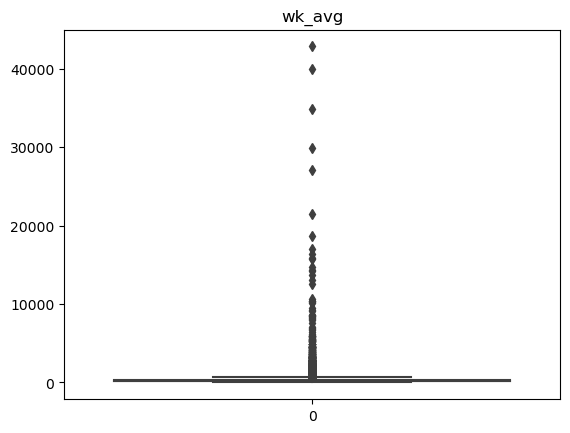

In [257]:
sns.boxplot(data=df['wk_avg'])
plt.title('wk_avg')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 1000 and there are many points are outside the ranges of the whisker thus it is considered as outliers.

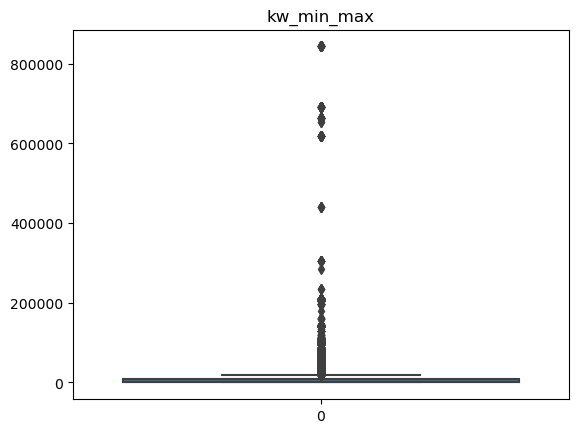

In [258]:
sns.boxplot(data=df['kw_min_max'])
plt.title('kw_min_max')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 10000 and there are many points are outside the ranges of the whisker thus it is considered as outliers.

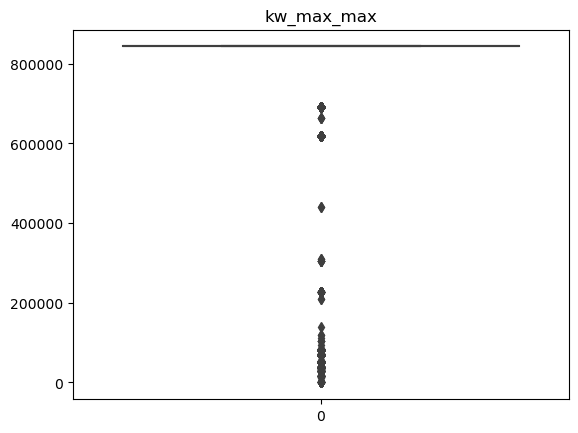

In [270]:
sns.boxplot(data=df['kw_max_max'])
plt.title('kw_max_max')
plt.show()

* In the corresponding box plot, the whisker ranges between same points and there are many points are outside the ranges of the whisker thus it is considered as outliers.

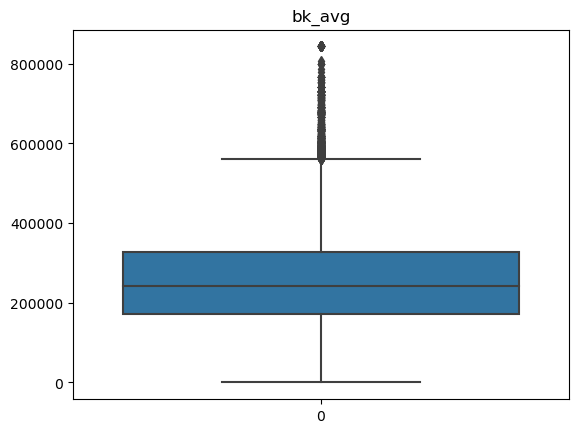

In [271]:
sns.boxplot(data=df['bk_avg'])
plt.title('bk_avg')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 600000 and there are many points are outside the ranges of the whisker thus it is considered as outliers.

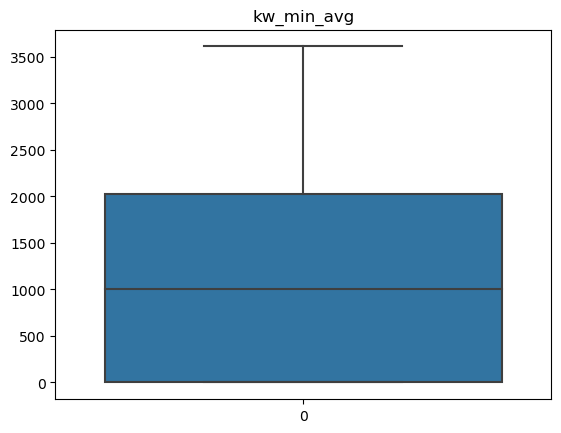

In [272]:
sns.boxplot(data=df['kw_min_avg'])
plt.title('kw_min_avg')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 3500 and thereno points outside the ranges of the whisker thus there is no presence of outliers in this variable.

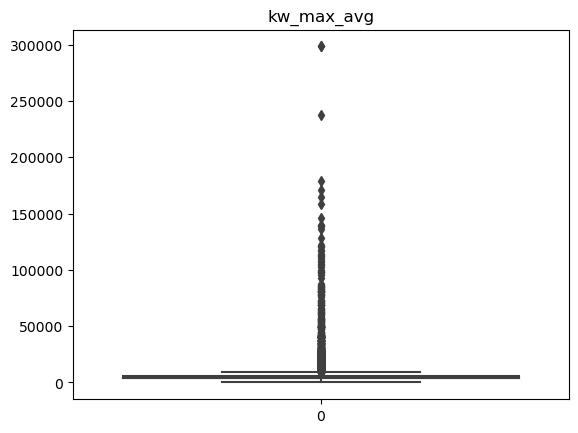

In [273]:
sns.boxplot(data=df['kw_max_avg'])
plt.title('kw_max_avg')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 10000 and there are many points are outside the ranges of the whisker thus it is considered as outliers.

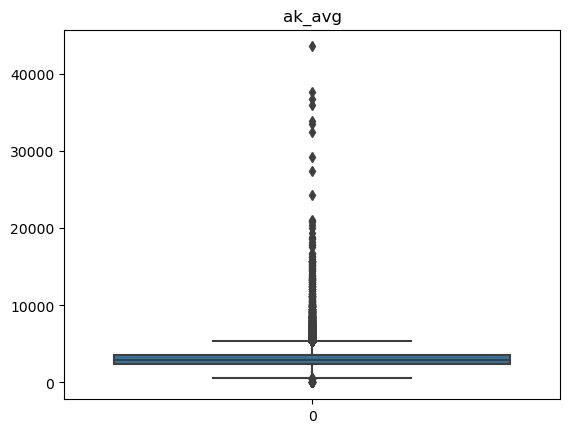

In [274]:
sns.boxplot(data=df['ak_avg'])
plt.title('ak_avg')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 5000 and there are many points are outside the ranges of the whisker thus it is considered as outliers.

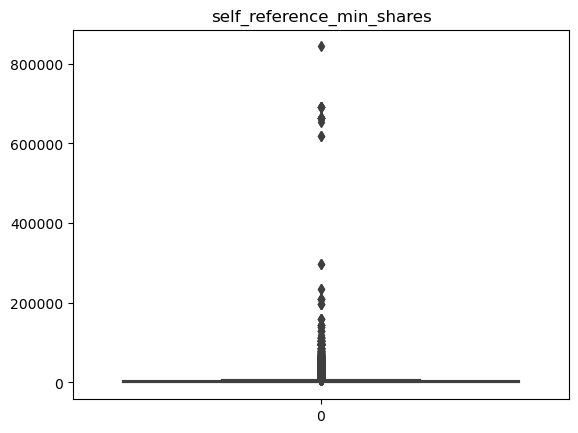

In [275]:
sns.boxplot(data=df['self_reference_min_shares'])
plt.title('self_reference_min_shares')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 10000 and there are many points are outside the ranges of the whisker thus it is considered as outliers.

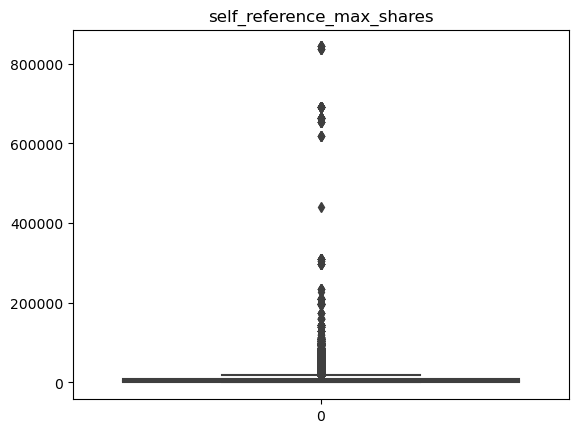

In [276]:
sns.boxplot(data=df['self_reference_max_shares'])
plt.title('self_reference_max_shares')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 10000 and there are many points are outside the ranges of the whisker thus it is considered as outliers.

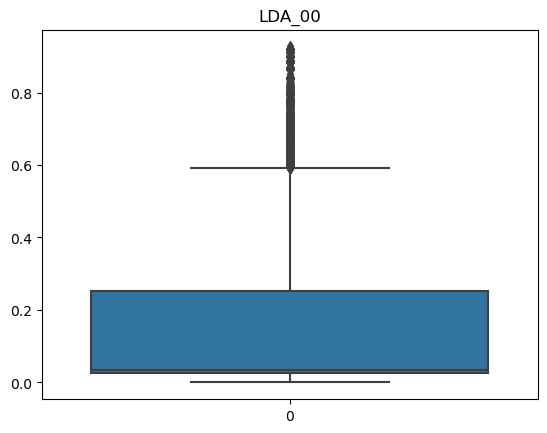

In [277]:
sns.boxplot(df.LDA_00)
plt.title('LDA_00')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 0.6 and there are many points are outside the ranges of the whisker thus it is considered as outliers.

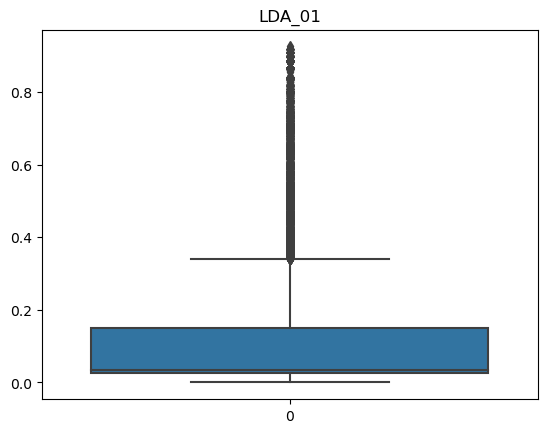

In [278]:
sns.boxplot(df.LDA_01)
plt.title('LDA_01')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 0.4 and there are many points are outside the ranges of the whisker thus it is considered as outliers.

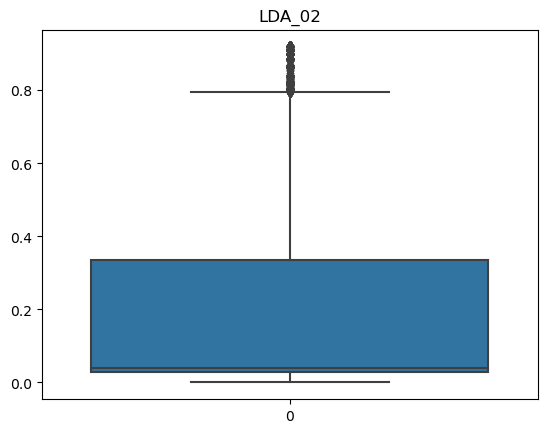

In [279]:
sns.boxplot(df.LDA_02)
plt.title('LDA_02')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 0.8 and there are many points are outside the ranges of the whisker thus it is considered as outliers.

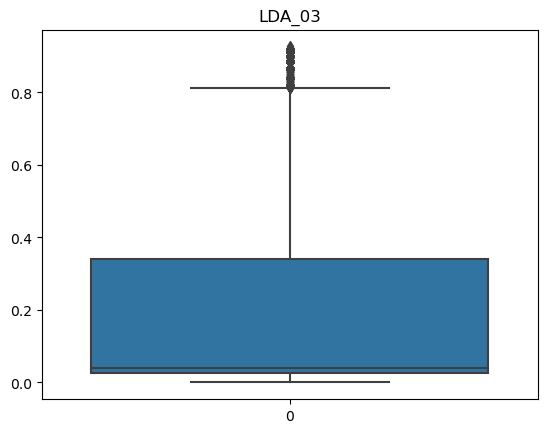

In [280]:
sns.boxplot(df.LDA_03)
plt.title('LDA_03')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 0.8 and there are few points are outside the ranges of the whisker thus it is considered as outliers.

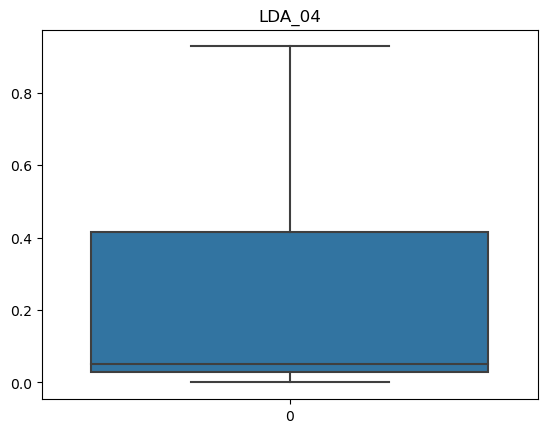

In [281]:
sns.boxplot(df.LDA_04)
plt.title('LDA_04')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 1 and there are no points outside the ranges of the whisker thus there is no outliers present.

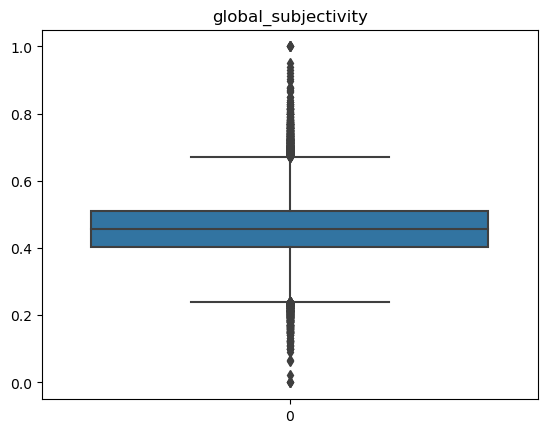

In [282]:
sns.boxplot(df.global_subjectivity)
plt.title('global_subjectivity')
plt.show()

* In the corresponding box plot, the whisker ranges between 0.2 to 0.4 and there are many points outside the ranges of the whisker thus it is considered as outliers.

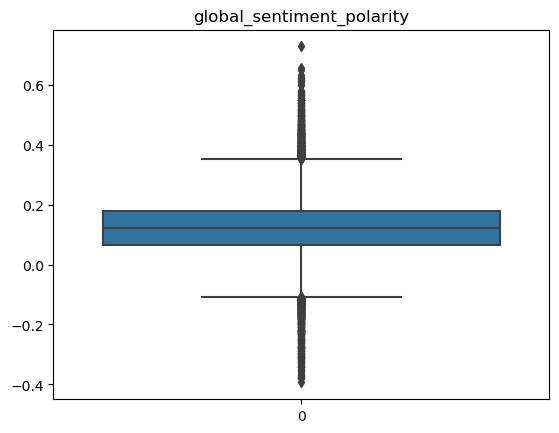

In [283]:
sns.boxplot(df.global_sentiment_polarity)
plt.title('global_sentiment_polarity')
plt.show()

* In the corresponding box plot, the whisker ranges between 0.2 to 0.4 and there are many points outside the ranges of the whisker thus it is considered as outliers.

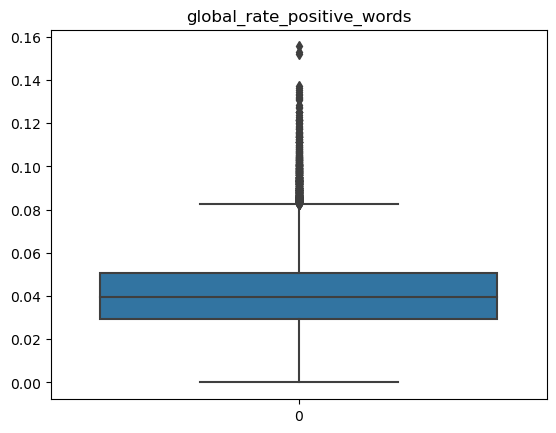

In [284]:
sns.boxplot(df.global_rate_positive_words)
plt.title('global_rate_positive_words')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 0.08 and there are many points outside the ranges of the whisker thus it is considered as outliers.

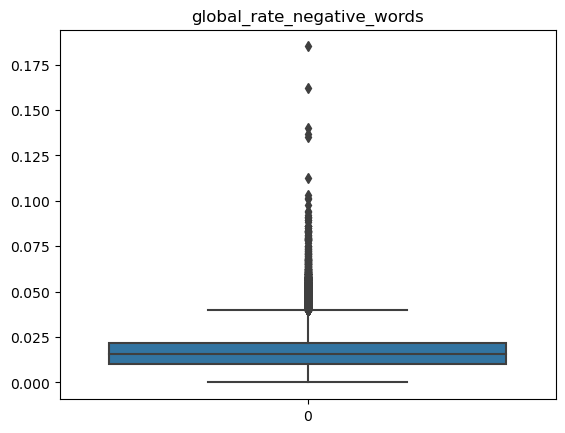

In [285]:
sns.boxplot(df.global_rate_negative_words)
plt.title('global_rate_negative_words')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 0.05 and there are many points outside the ranges of the whisker thus it is considered as outliers.

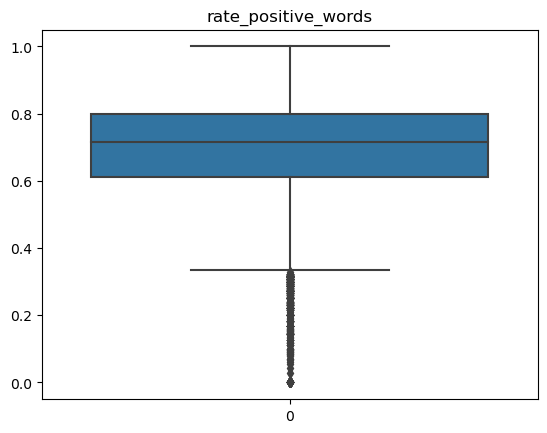

In [286]:
sns.boxplot(df.rate_positive_words)
plt.title('rate_positive_words')
plt.show()

* In the corresponding box plot, the whisker ranges between 0.02 to 1 and there are many points outside the ranges of the whisker thus it is considered as outliers.

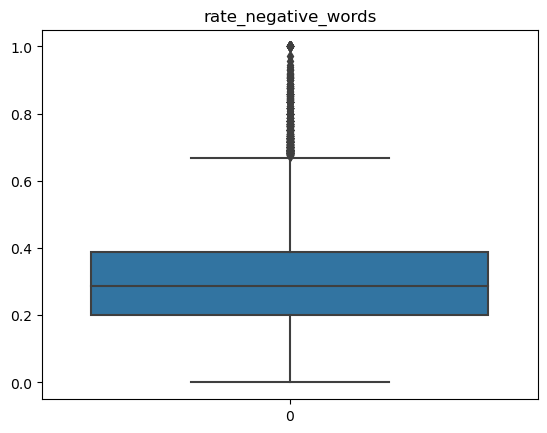

In [287]:
sns.boxplot(df['rate_negative_words'])
plt.title('rate_negative_words')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 0.6 and there are many points outside the ranges of the whisker thus it is considered as outliers.

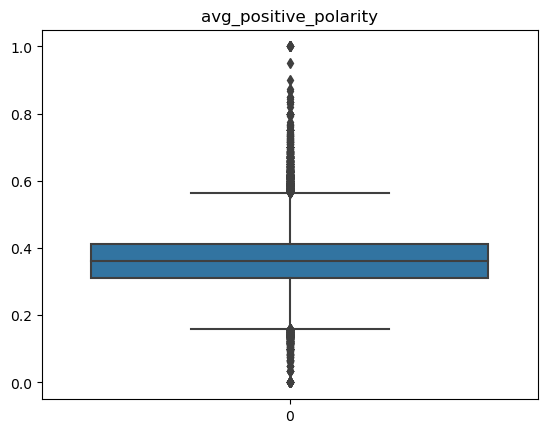

In [288]:
sns.boxplot(df['avg_positive_polarity'])
plt.title('avg_positive_polarity')
plt.show()

* In the corresponding box plot, the whisker ranges between 0.1 to 0.6 and there are many points outside the ranges of the whisker thus it is considered as outliers.

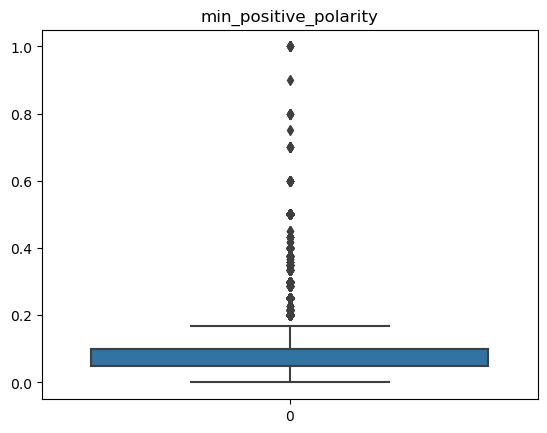

In [289]:
sns.boxplot(df['min_positive_polarity'])
plt.title('min_positive_polarity')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 0.2 and there are many points outside the ranges of the whisker thus it is considered as outliers.

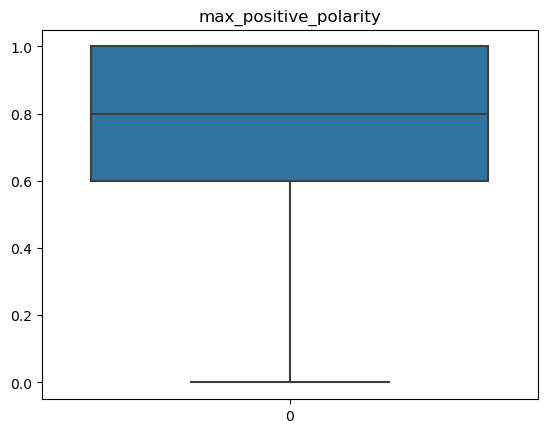

In [290]:
sns.boxplot(df[ 'max_positive_polarity'])
plt.title( 'max_positive_polarity')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 1 and there are no points outside the ranges of the whisker thus there is no outliers are present.

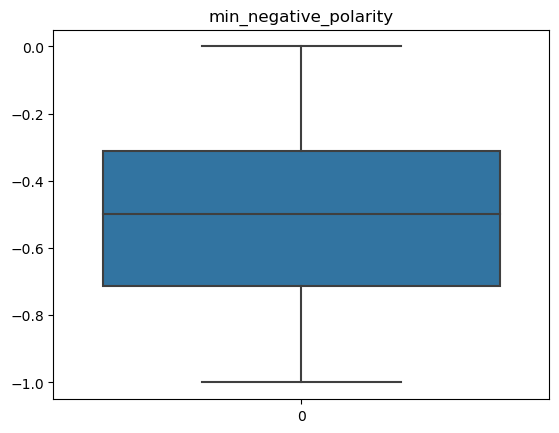

In [291]:
sns.boxplot(df['min_negative_polarity'])
plt.title('min_negative_polarity')
plt.show()

* In the corresponding box plot, the whisker ranges between -1 to 0 and there are no points outside the ranges of the whisker thus there is no outliers are present.

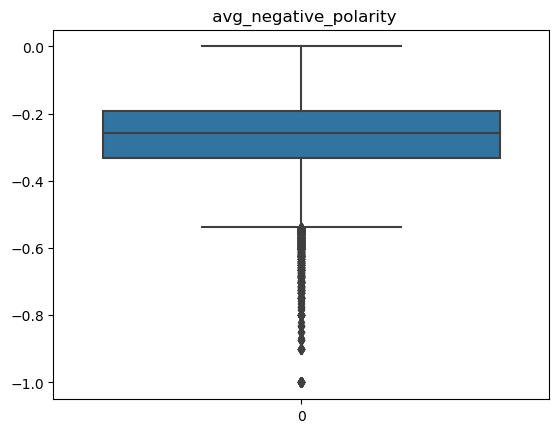

In [292]:
sns.boxplot(df['avg_negative_polarity'])
plt.title(' avg_negative_polarity')
plt.show()

* In the corresponding box plot, the whisker ranges between -1 to 0 and there are may points outside the ranges of the whisker thus they are considered as outliers.

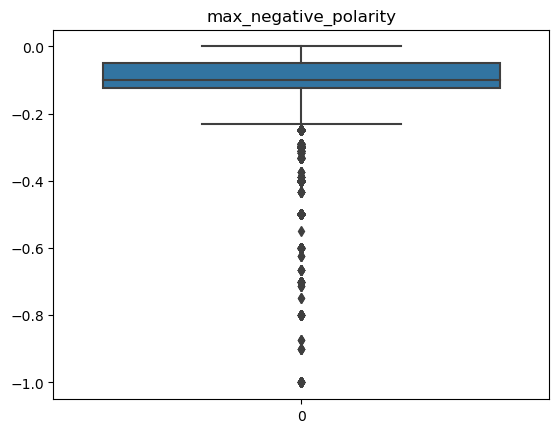

In [293]:
sns.boxplot(df['max_negative_polarity'])
plt.title('max_negative_polarity')
plt.show()

* In the corresponding box plot, the whisker ranges between -0.2 to 0 and there are may points outside the ranges of the whisker thus they are considered as outliers.

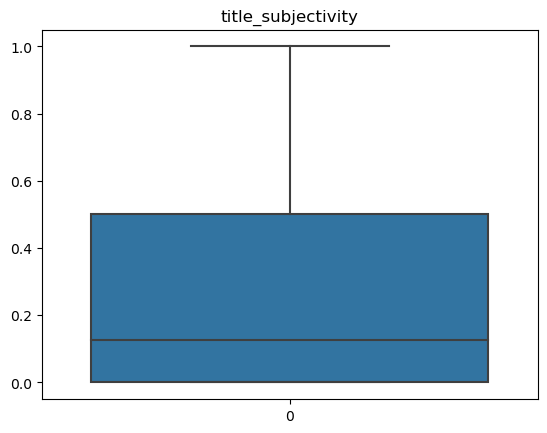

In [294]:
sns.boxplot(df['title_subjectivity'])
plt.title('title_subjectivity')
plt.show()


* In the corresponding box plot, the whisker ranges between 0 to 1 and there are no points outside the ranges of the whisker thus there is no outliers are present.

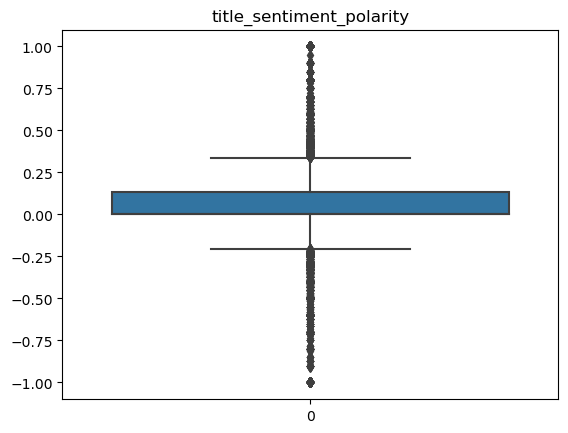

In [295]:
sns.boxplot(df['title_sentiment_polarity'])
plt.title('title_sentiment_polarity')
plt.show()

* In the corresponding box plot, the whisker ranges between -0.25 to 0.5 and there are may points outside the ranges of the whisker thus they are considered as outliers.

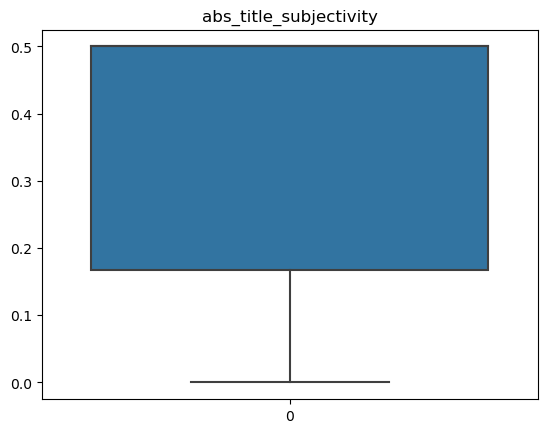

In [296]:
sns.boxplot(df['abs_title_subjectivity'])
plt.title('abs_title_subjectivity')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 0.5 and there are no points outside the ranges of the whisker thus there is no outliers are present.

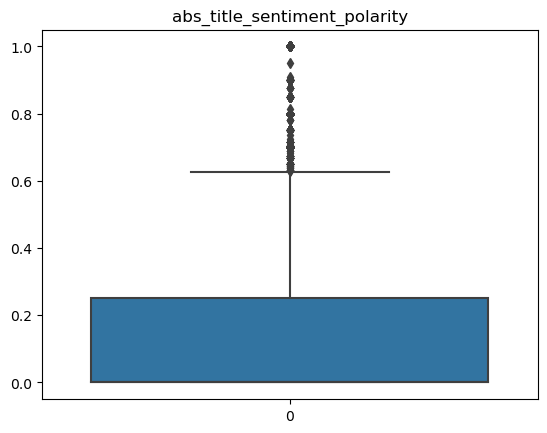

In [297]:
sns.boxplot(df['abs_title_sentiment_polarity'])
plt.title('abs_title_sentiment_polarity')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 0.2 and there are may points outside the ranges of the whisker thus they are considered as outliers.

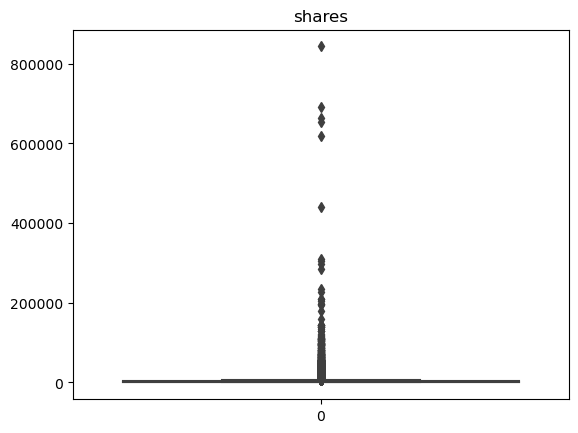

In [298]:
sns.boxplot(df['shares'])
plt.title('shares')
plt.show()

* In the corresponding box plot, the whisker ranges between 0 to 10000 and there are may points outside the ranges of the whisker thus they are considered as outliers.

##### Checking for skewness

In [299]:
df[num].skew()

timedelta                         0.090555
n_tokens_title                    0.171154
n_tokens_content                  3.032061
n_unique_tokens                 195.878687
n_non_stop_words                196.119861
n_non_stop_unique_tokens        195.848307
num_hrefs                         4.066084
num_self_hrefs                    5.211855
num_imgs                          3.958481
num_videos                        6.925319
average_token_length              0.576460
num_keywords                     -0.144288
kw_min_min                        2.336750
kw_max_min                       35.843745
wk_avg                           31.565961
kw_min_max                       10.594634
kw_max_max                       -2.606314
bk_avg                            0.599348
kw_min_avg                        0.473492
kw_max_avg                       16.631033
ak_avg                            6.070519
self_reference_min_shares        25.901056
self_reference_max_shares        13.680282
self_refere

* timedelta is having a skewness of less than 1 thus no need of any treatments.
* n_tokens_title is having a skewness of less than 1 thus no need of any treatments.
* n_tokens_content is having a skewness of more than 1 thus needs to be treated.
* n_unique_tokens is having a skewness of more than 1 thus needs to be treated.
* n_non_stop_words is having a skewness of more than 1 thus needs to be treated.
* n_non_stop_unique_tokens is having a skewness of more than 1 thus needs to be treated.
* num_hrefs is having a skewness of more than 1 thus needs to be treated.
* num_self_hrefs is having a skewness of more than 1 thus needs to be treated.
* num_imgs is having a skewness of more than 1 thus needs to be treated.
* num_videos is having a skewness of more than 1 thus needs to be treated.
* average_token_length is having a skewness of less than 1 thus no need of any treatments.
* num_keywords is having a skewness of less than 1 thus no need of any treatments.
* kw_min_min is having a skewness of more than 1 thus needs to be treated.
* kw_max_min is having a skewness of more than 1 thus needs to be treated.
* wk_avg is having a skewness of more than 1 thus needs to be treated.
* kw_min_max is having a skewness of more than 1 thus needs to be treated.
* kw_max_max is having a skewness of less than 1 thus no need of any treatments.
* bk_avg is having a skewness of less than 1 thus no need of any treatments.
* kw_min_avg is having a skewness of less than 1 thus no need of any treatments.
* kw_max_avg is having a skewness of more than 1 thus needs to be treated.
* ak_avg is having a skewness of more than 1 thus needs to be treated.
* self_reference_min_shares is having a skewness of more than 1 thus needs to be treated.
* self_reference_max_shares is having a skewness of more than 1 thus needs to be treated.
* self_reference_avg_sharess is having a skewness of more than 1 thus needs to be treated.
* LDA_00 is having a skewness of more than 1 thus needs to be treated.
* LDA_01 is having a skewness of more than 1 thus needs to be treated.
* LDA_02 is having a skewness of more than 1 thus needs to be treated.
* LDA_03 is having a skewness of more than 1 thus needs to be treated.
* LDA_04 is having a skewness of more than 1 thus needs to be treated.
* global_subjectivity is having a skewness of less than 1 thus no need of any treatments.
* global_sentiment_polarity is having a skewness of less than 1 thus no need of any treatments.
* global_rate_positive_words is having a skewness of less than 1 thus no need of any treatments.
* global_rate_negative_words is having a skewness of more than 1 thus needs to be treated.
* rate_positive_words is having a skewness of less than 1 thus no need of any treatments.
* rate_negative_words is having a skewness of less than 1 thus no need of any treatments.
* avg_positive_polarity is having a skewness of less than 1 thus no need of any treatments.
* min_positive_polarity is having a skewness of more than 1 thus needs to be treated.
* max_positive_polarity is having a skewness of less than 1 thus no need of any treatments.
* avg_negative_polarity is having a skewness of less than 1 thus no need of any treatments.
* min_negative_polarity is having a skewness of less than 1 thus no need of any treatments.
* max_negative_polarity is having a skewness of less than 1 thus no need of any treatments.
* title_subjectivity is having a skewness of less than 1 thus no need of any treatments.
* title_sentiment_polarity is having a skewness of less than 1 thus no need of any treatments.
* abs_title_subjectivity is having a skewness of less than 1 thus no need of any treatments.
* abs_title_sentiment_polarity is having a skewness of more than 1 thus needs to be treated.
* shares is having a skewness of more than 1 thus needs to be treated.

In [300]:
df[num].skew()[df[num].skew() > 1].index

Index(['n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'kw_min_min', 'kw_max_min', 'wk_avg', 'kw_min_max',
       'kw_max_avg', 'ak_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_rate_negative_words',
       'min_positive_polarity', 'abs_title_sentiment_polarity', 'shares'],
      dtype='object')

* Thus 25 independednt variables such as 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'kw_min_min', 'kw_max_min', 'wk_avg', 'kw_min_max',
       'kw_max_avg', 'ak_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_rate_negative_words',
       'min_positive_polarity', 'abs_title_sentiment_polarity' needs to be treated.

### Bivariate Analysis

##### Categorical Vs Target

<Axes: xlabel='categories', ylabel='shares'>

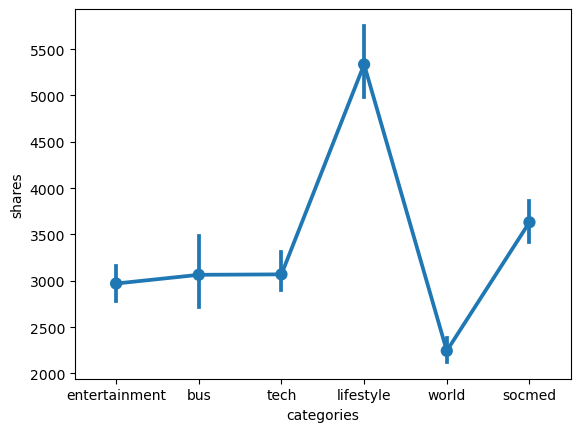

In [301]:
sns.pointplot(x = df.categories , y = df.shares )

* The lifestyle artices gets maximum shares.

<Axes: xlabel='days', ylabel='shares'>

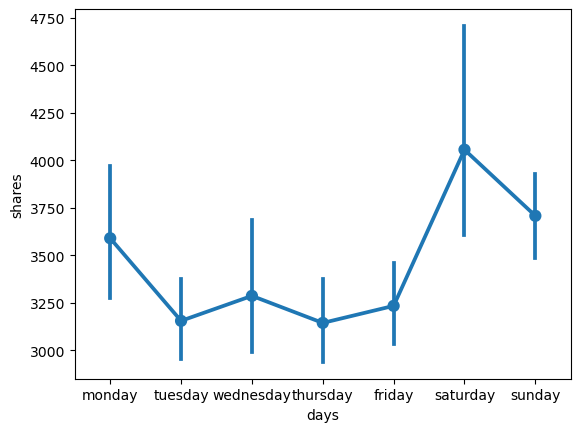

In [302]:
sns.pointplot(x = df.days , y = df.shares )

* The articles getting most number of shares on saturday.

### Multivariate Analysis

#### Checking for correlation between numerical variables.

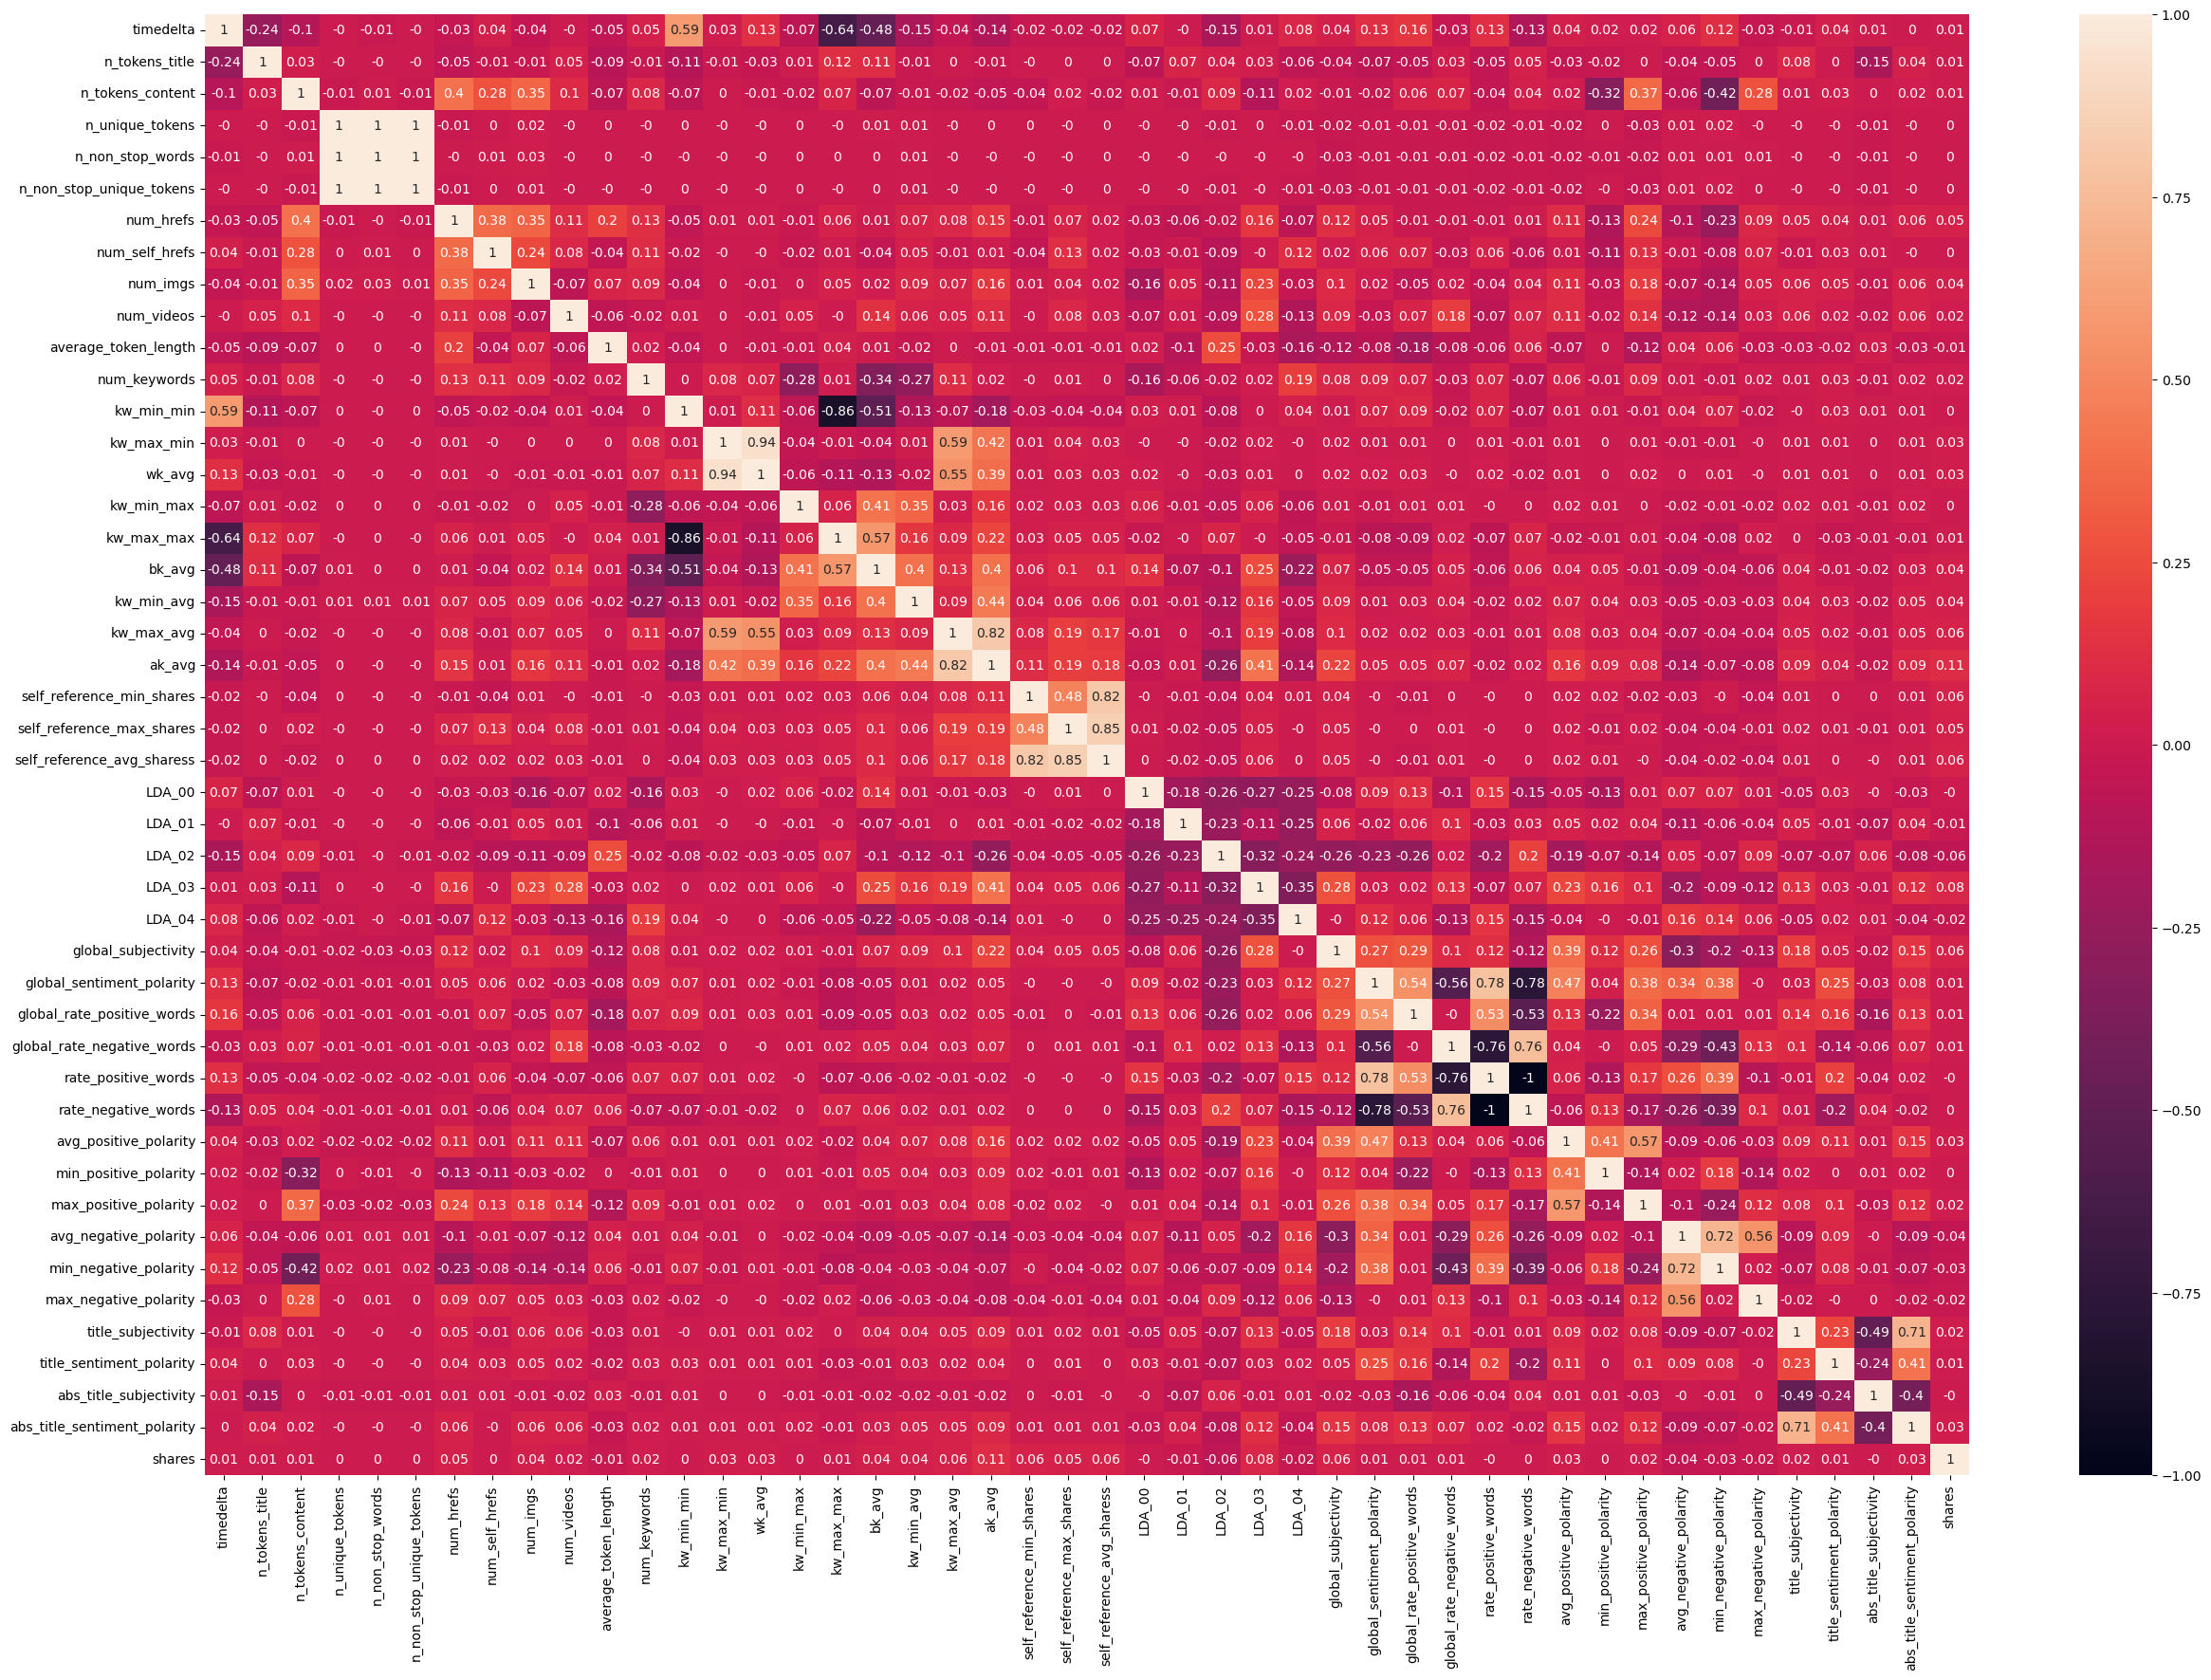

In [304]:
plt.figure(figsize=(30,20),dpi=100)
sns.heatmap(round(df[num].corr(),2),annot = True)
plt.show()

* There is a strong negative correlation between timedelta and kw_max_max.
* There is a strong negative correlation between kw_min_min and kw_max_max.
* There is a strong negative correlation between timedelta and bk_avg.
* There is a strong negative correlation between kw_min_min and bk_avg.
* There is a strong negative correlation between global_sentiment_polarity and rate_negative_words.
* There is a strong positive correlation between n_non_stop_words and n_unique_words.
* There is a strong positive correlation between n_non_stop_words and n_non_stop_unique_words.
* There is a strong positive correlation between bk_avg and kw_min_max.
* There is a strong positive correlation between rate_postive_words and average_token_length.
* There is a strong positive correlation between average_positive_polarity and average_token_length.
* There is a strong positive correlation between average_positive_polarity and global_subjectivity.
* There is a strong positive correlation between rate_positive_words and average_token_length.
* There is a strong positive correlation between average_negative_polarity and min_negative_polarity.

### Randomly imputing null values (Learning purpose)

Randomly selecting 4 columns and imputing null values to perform some null value treatments. only for learning purpose as the dataset does't consist of any null values.

In [305]:
df_null = df.copy()

In [306]:
df_null1 = df_null['average_token_length']
percentage_of_nulls = 0.005 
num_nulls = int(percentage_of_nulls * df_null1.size)
null_indices = np.random.choice(df_null1.index, num_nulls, replace=False)
df_null1.loc[null_indices] = np.nan

# Display the DataFrame with induced null values
df_null1 = pd.DataFrame(df_null1)

In [307]:
df_null2 = df_null['global_rate_positive_words']
percentage_of_nulls = 0.003 
num_nulls = int(percentage_of_nulls * df_null2.size)
null_indices = np.random.choice(df_null2.index, num_nulls, replace=False)
df_null2.loc[null_indices] = np.nan

# Display the DataFrame with induced null values
df_null2 = pd.DataFrame(df_null2)

In [308]:
df_null3 = df_null['wednesday']
percentage_of_nulls = 0.002 
num_nulls = int(percentage_of_nulls * df_null3.size)
null_indices = np.random.choice(df_null3.index, num_nulls, replace=False)
df_null3.loc[null_indices] = np.nan

# Display the DataFrame with induced null values
df_null3 = pd.DataFrame(df_null3)

In [309]:
df_null4 = df_null['n_non_stop_unique_tokens']
percentage_of_nulls = 0.006
num_nulls = int(percentage_of_nulls * df_null4.size)
null_indices = np.random.choice(df_null4.index, num_nulls, replace=False)
df_null4.loc[null_indices] = np.nan

# Display the DataFrame with induced null values
df_null4 = pd.DataFrame(df_null4)

In [310]:
df_null.drop(columns = ['average_token_length','global_rate_positive_words','wednesday','n_non_stop_unique_tokens'],axis=1 , inplace = True)

In [311]:
df_null = pd.concat([df_null,df_null1,df_null2,df_null3,df_null4],axis=1)

In [312]:
df_null.isna().sum()

timedelta                         0
n_tokens_title                    0
n_tokens_content                  0
n_unique_tokens                   0
n_non_stop_words                  0
num_hrefs                         0
num_self_hrefs                    0
num_imgs                          0
num_videos                        0
num_keywords                      0
lifestyle                         0
entertainment                     0
bus                               0
socmed                            0
tech                              0
world                             0
kw_min_min                        0
kw_max_min                        0
wk_avg                            0
kw_min_max                        0
kw_max_max                        0
bk_avg                            0
kw_min_avg                        0
kw_max_avg                        0
ak_avg                            0
self_reference_min_shares         0
self_reference_max_shares         0
self_reference_avg_sharess  

### Treating Null values

The Null values is treated by imputing the median values in place of null.

In [313]:
df_null.average_token_length = df_null.average_token_length.fillna(df_null.average_token_length.median())
df_null.global_rate_positive_words = df_null.global_rate_positive_words.fillna(df_null.global_rate_positive_words.median())
df_null.wednesday = df_null.wednesday.fillna(df_null.wednesday.median())
df_null.n_non_stop_unique_tokens = df_null.n_non_stop_unique_tokens.fillna(df_null.n_non_stop_unique_tokens.median())

In [314]:
df_null.isna().sum()

timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
n_non_stop_words                0
num_hrefs                       0
num_self_hrefs                  0
num_imgs                        0
num_videos                      0
num_keywords                    0
lifestyle                       0
entertainment                   0
bus                             0
socmed                          0
tech                            0
world                           0
kw_min_min                      0
kw_max_min                      0
wk_avg                          0
kw_min_max                      0
kw_max_max                      0
bk_avg                          0
kw_min_avg                      0
kw_max_avg                      0
ak_avg                          0
self_reference_min_shares       0
self_reference_max_shares       0
self_reference_avg_sharess      0
monday                          0
tuesday       

### Treating Anomalies , Negative values and Outliers

In [18]:
df[num].min()[df[num].min() <0]

kw_min_min                  -1.00000
wk_avg                      -1.00000
kw_min_avg                  -1.00000
global_sentiment_polarity   -0.39375
avg_negative_polarity       -1.00000
min_negative_polarity       -1.00000
max_negative_polarity       -1.00000
title_sentiment_polarity    -1.00000
dtype: float64

* Since these columns are derived by NLP (Natural language processing) the negative values in these columns are feasible.

In [19]:
(df[num] == 0).sum()

timedelta                           0
n_tokens_title                      0
n_tokens_content                 1181
n_unique_tokens                  1181
n_non_stop_words                 1181
n_non_stop_unique_tokens         1181
num_hrefs                        1299
num_self_hrefs                   5350
num_imgs                         6987
num_videos                      25026
average_token_length             1181
num_keywords                        0
kw_min_min                         79
kw_max_min                        819
wk_avg                             81
kw_min_max                      17108
kw_max_max                         79
bk_avg                             79
kw_min_avg                      17102
kw_max_avg                         79
ak_avg                             79
self_reference_min_shares        7174
self_reference_max_shares        7175
self_reference_avg_sharess       7174
LDA_00                              1
LDA_01                              1
LDA_02      

* There are 1181 data points where the "n_tokens_content" variable is recorded as zero.
* The variable "n_tokens_content" significantly contributes to other variables.
* If "n_tokens_content" is zero, it suggests potential errors in associated variables like "n_unique_tokens," "n_non_stop_words," "n_non_stop_unique_tokens," "num_hrefs," and "num_self_hrefs."
* Without any content (zero tokens), deriving meaningful values for these related variables becomes implausible.
* Removing observations with zero "n_tokens_content" would enhance the dataset's overall meaningfulness.

In [20]:
df = df[df['n_tokens_content'] !=0]

* The zeros are removed from n_tokens_content.

###### Treating outliers

Since there some variables with outliers we are performing IQR to remove those outliers and also to change the distribution of each variable to normal.

In [21]:
q1 = df.quantile(0.025)
q3 = df.quantile(0.975)

iqr = q3 - q1

upper = q3+ 1.5*iqr
lower = q1 - 1.5*iqr

df_outlier = df[~((df[num] < lower)|(df[num] > upper)).any(axis=1)]
df_outlier.shape

(36810, 63)

In [22]:
df_outlier[num].skew()

timedelta                       0.086192
n_tokens_title                  0.169637
n_tokens_content                2.220107
n_unique_tokens                 0.185053
n_non_stop_words                0.000000
n_non_stop_unique_tokens       -0.304762
num_hrefs                       2.685453
num_self_hrefs                  2.987775
num_imgs                        3.244000
num_videos                      5.065681
average_token_length            0.425569
num_keywords                   -0.098764
kw_min_min                      2.317673
kw_max_min                      4.767011
wk_avg                          2.766168
kw_min_max                      5.208274
kw_max_max                     -2.581680
bk_avg                          0.390354
kw_min_avg                      0.485891
kw_max_avg                      3.361404
ak_avg                          1.120054
self_reference_min_shares       5.186511
self_reference_max_shares       4.388272
self_reference_avg_sharess      3.970471
LDA_00          

* After the IQR treatment the skewness of many variables have been insdie the advisable range (-1 to 1) but some of the variables are outside this range which is needs to be treated.

### Transforming the Independent variables.

In [23]:
df_outlier[num].skew()[(df_outlier[num].skew() > 1)| (df_outlier[num].skew() < -1)]

n_tokens_content                2.220107
num_hrefs                       2.685453
num_self_hrefs                  2.987775
num_imgs                        3.244000
num_videos                      5.065681
kw_min_min                      2.317673
kw_max_min                      4.767011
wk_avg                          2.766168
kw_min_max                      5.208274
kw_max_max                     -2.581680
kw_max_avg                      3.361404
ak_avg                          1.120054
self_reference_min_shares       5.186511
self_reference_max_shares       4.388272
self_reference_avg_sharess      3.970471
LDA_00                          1.543482
LDA_01                          2.078727
LDA_02                          1.273473
LDA_03                          1.356323
LDA_04                          1.123535
global_rate_negative_words      1.349882
min_positive_polarity           2.713846
max_negative_polarity          -3.556073
abs_title_sentiment_polarity    1.722141
shares          

In order to reduce the skewness of above mentioned columns and make the distribution as normal trasformation of data is done to the independent variables.

In [24]:
from sklearn.preprocessing import PowerTransformer

In [25]:
df_transformed = df_outlier.copy()

In [26]:
pt = PowerTransformer()
df_transformed[['n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'kw_min_min', 'kw_max_min', 'wk_avg', 'kw_min_max',
       'kw_max_max', 'kw_max_avg', 'ak_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_rate_negative_words',
       'min_positive_polarity', 'max_negative_polarity',
       'abs_title_sentiment_polarity']] = pt.fit_transform(df_transformed[['n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'kw_min_min', 'kw_max_min', 'wk_avg', 'kw_min_max',
       'kw_max_max', 'kw_max_avg', 'ak_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_rate_negative_words',
       'min_positive_polarity', 'max_negative_polarity',
       'abs_title_sentiment_polarity']])

In [27]:
df_transformed[num].skew()

timedelta                       0.086192
n_tokens_title                  0.169637
n_tokens_content                0.001761
n_unique_tokens                 0.185053
n_non_stop_words                0.000000
n_non_stop_unique_tokens       -0.304762
num_hrefs                       0.000415
num_self_hrefs                  0.000473
num_imgs                        0.168130
num_videos                      0.719321
average_token_length            0.425569
num_keywords                   -0.098764
kw_min_min                      0.546165
kw_max_min                      0.320615
wk_avg                          0.194135
kw_min_max                     -0.064317
kw_max_max                     -1.739674
bk_avg                          0.390354
kw_min_avg                      0.485891
kw_max_avg                      0.596979
ak_avg                          0.279089
self_reference_min_shares      -0.086458
self_reference_max_shares      -0.181664
self_reference_avg_sharess     -0.193973
LDA_00          

* From transformation the skewness of the data and outliers are reduced.

### Statistical Analysis

##### Anova - Between Shares and category variables.

Hypothesis

Ho : The mean of all the category are same.

Ha : Atleast one mean of category is not same.

In [28]:
from statsmodels.stats.anova import anova_lm

In [29]:
cat_a = df_transformed[df_transformed['categories'] == 'lifestyle']['shares']
cat_b = df_transformed[df_transformed['categories'] == 'entertainment']['shares']
cat_c = df_transformed[df_transformed['categories'] == 'bus']['shares']
cat_d = df_transformed[df_transformed['categories'] == 'socmed']['shares']
cat_e = df_transformed[df_transformed['categories'] == 'tech']['shares']
cat_f = df_transformed[df_transformed['categories'] == 'world']['shares']

Assuming that data is normal and variance are equal.

In [30]:
stats.f_oneway(cat_a,cat_b,cat_c,cat_d,cat_e,cat_f)

F_onewayResult(statistic=215.9752162809794, pvalue=6.910061435120121e-228)

* As P value is lesser than the level of significance (0.05) thus we are rejecting the null hypothesis. 
* Thus the mean of shares among all the category are not same.

Proceding with Post Hoc test to identify which mean is not equal.

In [31]:
import statsmodels.stats.multicomp as mc

In [32]:
comp = mc.MultiComparison(data= df_transformed['shares'] , groups =df_transformed['categories'] )
post_hoc = comp.tukeyhsd(alpha = 0.05)
post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
bus,entertainment,154.5933,0.2549,-49.0103,358.197,False
bus,lifestyle,1613.2221,0.0,1412.3022,1814.1421,True
bus,socmed,1025.841,0.0,738.4025,1313.2795,True
bus,tech,508.3405,0.0,307.8382,708.8429,True
bus,world,-365.5525,0.0,-560.6516,-170.4534,True
entertainment,lifestyle,1458.6288,0.0,1263.299,1653.9585,True
entertainment,socmed,871.2477,0.0,587.6886,1154.8067,True
entertainment,tech,353.7472,0.0,158.8471,548.6474,True
entertainment,world,-520.1458,0.0,-709.4829,-330.8088,True
lifestyle,socmed,-587.3811,0.0,-869.0194,-305.7428,True


* The mean of bus and lifestyle is not equal.
* The mean of bus and world is not equal.
* The mean of entertainment and lifestyle is not equal.
* The mean of entertainment and world is not equal.
* The mean of lifestyle and scomed is not equal.
* The mean of lifestyle and tech is not equal.
* The mean of lifestyle and world is not equal.
* The mean of scomed and world is not equal.
* The mean of tech and world is not equal.

##### Anova - Between shares and days variables.

Hypothesis

Ho : The mean of all the days are same.

Ha : Atleast one mean of days is not same.

In [33]:
days_a = df_transformed[df_transformed['days'] == 'monday']['shares']
days_b = df_transformed[df_transformed['days'] == 'tuesday']['shares']
days_c = df_transformed[df_transformed['days'] == 'wednesday']['shares']
days_d = df_transformed[df_transformed['days'] == 'thursday']['shares']
days_e = df_transformed[df_transformed['days'] == 'friday']['shares']
days_f = df_transformed[df_transformed['days'] == 'saturday']['shares']
days_g = df_transformed[df_transformed['days'] == 'sunday']['shares']

Assuming that data is normal and population variance are equal.

In [34]:
stats.f_oneway(days_a,days_b,days_c,days_d,days_e,days_f,days_g)

F_onewayResult(statistic=27.484367237548103, pvalue=6.444130610899839e-33)

* As P value is lesser than the level of significance (0.05) thus we are rejecting the null hypothesis. 
* Thus the mean of shares among all the days are not same.

Proceding with Post Hoc test to identify which mean is not equal.

In [35]:
comp = mc.MultiComparison(data= df_transformed['shares'] , groups =df_transformed['days'] )
post_hoc = comp.tukeyhsd(alpha = 0.05)
post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
friday,monday,9.736,1.0,-213.631,233.1031,False
friday,saturday,695.9997,0.0,396.4516,995.5478,True
friday,sunday,606.7471,0.0,317.9959,895.4983,True
friday,thursday,-181.0368,0.1818,-399.7619,37.6884,False
friday,tuesday,-161.4687,0.3036,-379.359,56.4217,False
friday,wednesday,-204.3932,0.0826,-422.2077,13.4212,False
monday,saturday,686.2637,0.0,392.8376,979.6898,True
monday,sunday,597.0111,0.0,314.6157,879.4064,True
monday,thursday,-190.7728,0.1046,-401.0358,19.4902,False
monday,tuesday,-171.2047,0.1939,-380.5992,38.1898,False


* The mean of saturday and thursday is not equal.
* The mean of saturday and tuesday is not equal.

##### PearsonR - Between Numerical variables and shares.

Hypothesis

Ho: There is no significant correlation between two variables.

Ha: There is a significant correlation between two variables.

In [36]:
df_pearsonR = pd.DataFrame(columns=['independent_variable','pvalue','status'])

for x in df_transformed.drop(['lifestyle','entertainment', 'bus','socmed', 'tech','world','monday', 'tuesday','wednesday',
                              'thursday','friday','saturday', 'sunday', 'is_weekend','is_weekday' ,'shares','categories',
                              'days'],axis=1).columns:
    stat , p = stats.pearsonr(df_transformed[x] , df_transformed['shares'])
    status = 'Significant Correlation' if p< 0.05 else 'No Significant correlation'
    df_pearsonR = df_pearsonR.append({'independent_variable':x , 'pvalue':p,'status':status} , ignore_index=True)

In [37]:
df_pearsonR[df_pearsonR.status == 'Significant Correlation']

,independent_variable,pvalue,status
0,timedelta,1.023267e-06,Significant Correlation
5,n_non_stop_unique_tokens,6.628720e-06,Significant Correlation
6,num_hrefs,7.903569e-47,Significant Correlation
7,num_self_hrefs,1.553738e-02,Significant Correlation
8,num_imgs,1.799586e-24,Significant Correlation
9,num_videos,5.515337e-35,Significant Correlation
10,average_token_length,8.197793e-08,Significant Correlation
11,num_keywords,7.336704e-15,Significant Correlation
13,kw_max_min,2.520663e-16,Significant Correlation
14,wk_avg,3.633320e-14,Significant Correlation


* The above mention independent variableshave a significant correlation with shares.

In [38]:
df_pearsonR[df_pearsonR.status == 'No Significant correlation']

,independent_variable,pvalue,status
1,n_tokens_title,0.099088,No Significant correlation
2,n_tokens_content,0.148143,No Significant correlation
3,n_unique_tokens,0.532427,No Significant correlation
4,n_non_stop_words,0.111023,No Significant correlation
12,kw_min_min,0.136389,No Significant correlation
16,kw_max_max,0.751588,No Significant correlation
25,LDA_01,0.099324,No Significant correlation
28,LDA_04,0.628619,No Significant correlation
33,rate_positive_words,0.326999,No Significant correlation
34,rate_negative_words,0.341952,No Significant correlation


* The above mention independent variables does not have a significant correlation with shares.

##### Since all the necessary EDA process have been done we have been proceeding with building various models to get the best accurate model. 

### Model Building - Regression

#### Scorecard

In [39]:
scorecard_reg = pd.DataFrame(columns= ['model_name','train_RSquare','test_RSquare','train_RMSE','test_RMSE'])

In [40]:
from sklearn.metrics import mean_squared_error , r2_score , adjusted_rand_score

In [41]:
def update_scorecard_reg(name, train , pred_train , test , pred_test ):
    global scorecard_reg
    
    scorecard_reg = scorecard_reg.append({'model_name':name , 
                                  'train_RSquare': round(r2_score(train , pred_train),3),
                                  'test_RSquare': round(r2_score(test , pred_test),3),
                                  'train_RMSE': round(np.sqrt(mean_squared_error(train , pred_train)),3),
                                  'test_RMSE':round(np.sqrt(mean_squared_error(test , pred_test)),3)}, ignore_index = True)

In [1]:
import seaborn as sns

In [2]:
df=sns.load_dataset('iris')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

#### Buliding a Base OLS Model with raw data

##### Train Test split for raw data

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_raw = df.drop(columns=['shares','categories','days'],axis=1)
y_raw = df.shares
xtrain_raw,xtest_raw,ytrain_raw,ytest_raw = train_test_split(x_raw,y_raw,test_size=0.2,random_state=45)

##### OLS Model for raw data

In [44]:
from statsmodels.api import OLS , add_constant

In [45]:
# Building a model
model_base = OLS(ytrain_raw , add_constant(xtrain_raw)).fit()
model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     13.12
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          2.11e-117
Time:                        10:39:01   Log-Likelihood:            -3.3206e+05
No. Observations:               30770   AIC:                         6.642e+05
Df Residuals:                   30713   BIC:                         6.647e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1349.0049   4545.179     -0.297      0.767   -1.03e+04    7559.733
timedelta                        1.7849      0.453      3.940      0.000       0.897       2.673
n_tokens_title                 117.4055     33.958      3.457      0.001      50.846     183.965
n_tokens_content                 0.5891      0.252      2.334      0.020       0.094       1.084
n_unique_tokens               4132.1348   2200.711      1.878      0.060    -181.350    8445.620
n_non_stop_words             -1114.5782    745.026     -1.496      0.135   -2574.860     345.703
n_non_stop_unique_tokens     -2661.0627   1868.726     -1.424      0.154   -6323.844    1001.718
num_hrefs                       26.8920      7.625      3.527      0.000      11.947      41.836
num_self_hrefs                 -64.2709     20.475     -3.139      0.002    -104.402     -24.139
num_imgs                         3.9625     10.540      0.376      0.707     -16.697      24.622
num_videos                      -0.5293     18.307     -0.029      0.977     -36.411      35.352
average_token_length          -339.2058    277.208     -1.224      0.221    -882.545     204.133
num_keywords                    55.1428     42.908      1.285      0.199     -28.959     139.245
lifestyle                    -1207.7965    461.273     -2.618      0.009   -2111.910    -303.683
entertainment                -1240.4187    304.369     -4.075      0.000   -1836.994    -643.843
bus                          -1019.5555    446.161     -2.285      0.022   -1894.049    -145.062
socmed                        -754.6646    435.230     -1.734      0.083   -1607.734      98.405
tech                          -611.3055    435.011     -1.405      0.160   -1463.945     241.334
world                         -752.4052    444.287     -1.694      0.090   -1623.225     118.415
kw_min_min                       1.1250      1.863      0.604      0.546      -2.527       4.777
kw_max_min                       0.0837      0.058      1.431      0.152      -0.031       0.198
wk_avg                          -0.2583      0.362     -0.713      0.476      -0.968       0.451
kw_min_max                      -0.0022      0.001     -1.623      0.105      -0.005       0.000
kw_max_max                   -8.308e-05      0.001     -0.122      0.903      -0.001       0.001
bk_avg                          -0.0003      0.001     -0.265      0.791      -0.002       0.002
kw_min_avg                      -0.3977      0.088     -4.519      0.000      -0.570      -0.225
kw_max_avg                      -0.2246      0.029     -7.681      0.000      -0.282      -0.167
ak_avg                           1.7987      0.166     10.853      0.000       1.474       2.124
self_reference_min_shares        0.0163      0.009      1.890      0.059    

In [46]:
# Predicting the model
ypred_raw_train = model_base.predict(add_constant(xtrain_raw))
ypred_raw_test = model_base.predict(add_constant(xtest_raw))

In [47]:
#Updating scorecard
update_scorecard_reg('OLS Model with raw data',ytrain_raw , ypred_raw_train ,ytest_raw, ypred_raw_test)
scorecard_reg

,model_name,train_RSquare,test_RSquare,train_RMSE,test_RMSE
0,OLS Model with raw data,0.023,0.018,11763.142,10125.235


#### Building a OLS model with transformed data

##### Train Test split for transformed data

In [48]:
x_trans = df_transformed.drop(columns=['shares','categories','days'],axis=1)
y_trans = df_transformed.shares
xtrain_trans,xtest_trans,ytrain_trans,ytest_trans = train_test_split(x_trans,y_trans,test_size=0.2,random_state=55)

##### OLS Model for transformed data

In [50]:
model_base_transformed = OLS(ytrain_trans , add_constant(xtrain_trans)).fit()
model_base_transformed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     42.27
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:39:17   Log-Likelihood:            -2.8512e+05
No. Observations:               29448   AIC:                         5.704e+05
Df Residuals:                   29391   BIC:                         5.708e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1.106e+10   8.54e+09      1.295      0.195   -5.67e+09    2.78e+10
timedelta                        1.4129      0.254      5.556      0.000       0.914       1.911
n_tokens_title                  29.0712     11.459      2.537      0.011       6.611      51.531
n_tokens_content                31.2837     82.573      0.379      0.705    -130.563     193.130
n_unique_tokens              -1195.9466   1025.081     -1.167      0.243   -3205.151     813.258
n_non_stop_words             -1.854e+10   1.43e+10     -1.295      0.195   -4.66e+10    9.51e+09
n_non_stop_unique_tokens       265.1724    691.596      0.383      0.701   -1090.387    1620.732
num_hrefs                      181.1197     31.012      5.840      0.000     120.336     241.904
num_self_hrefs                -225.6667     36.012     -6.266      0.000    -296.252    -155.081
num_imgs                        15.8442     29.916      0.530      0.596     -42.792      74.481
num_videos                     166.5389     25.813      6.452      0.000     115.945     217.133
average_token_length          -120.7745     99.536     -1.213      0.225    -315.870      74.321
num_keywords                     2.7036     15.590      0.173      0.862     -27.854      33.261
lifestyle                     -342.7368    145.848     -2.350      0.019    -628.605     -56.869
entertainment                 -638.6302    102.310     -6.242      0.000    -839.163    -438.097
bus                           -421.1951    137.067     -3.073      0.002    -689.852    -152.538
socmed                          45.6102    143.064      0.319      0.750    -234.801     326.021
tech                            91.5755    132.916      0.689      0.491    -168.946     352.097
world                         -399.3751    136.579     -2.924      0.003    -667.076    -131.675
kw_min_min                    -157.6320     54.293     -2.903      0.004    -264.048     -51.216
kw_max_min                    -105.6035     70.966     -1.488      0.137    -244.700      33.493
wk_avg                           9.4430     78.676      0.120      0.904    -144.765     163.651
kw_min_max                    -669.0477     66.451    -10.068      0.000    -799.294    -538.801
kw_max_max                     -59.8154     42.279     -1.415      0.157    -142.684      23.053
bk_avg                          -0.0012      0.000     -3.618      0.000      -0.002      -0.001
kw_min_avg                       0.4225      0.065      6.492      0.000       0.295       0.550
kw_max_avg                    -140.9741     52.574     -2.681      0.007    -244.021     -37.927
ak_avg                         854.9308     70.770     12.080      0.000     716.218     993.644
self_reference_min_shares     -209.3022     83.848     -2.496      0.013    

In [51]:
ypred_trans_train = model_base_transformed.predict(add_constant(xtrain_trans))
ypred_trans_test = model_base_transformed.predict(add_constant(xtest_trans))

In [52]:
update_scorecard_reg('OLS Model with transformed data',ytrain_trans,ypred_trans_train , ytest_trans , ypred_trans_test)
scorecard_reg

,model_name,train_RSquare,test_RSquare,train_RMSE,test_RMSE
0,OLS Model with raw data,0.023,0.018,11763.142,10125.235
1,OLS Model with transformed data,0.075,0.071,3878.817,4010.010


#### Buliding a model with significant features based on PearsonR

##### Train Test split for significant features based on PearsonR

In [53]:
x_r = df_transformed.drop(columns=['n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'kw_min_min',
 'kw_max_max',
 'LDA_01',
 'LDA_04',
 'rate_positive_words',
 'rate_negative_words',
 'abs_title_subjectivity','shares','categories','days'] ,axis=1)
y_trans = df_transformed.shares
xtrain_r,xtest_r,ytrain_r,ytest_r = train_test_split(x_r,y_trans,test_size=0.2,random_state=95)

##### OLS Model for significant features based on PearsonR

In [54]:
model_sig_fea = OLS(ytrain_r,add_constant(xtrain_r)).fit()
model_sig_fea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     50.61
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:39:34   Log-Likelihood:            -2.8546e+05
No. Observations:               29448   AIC:                         5.710e+05
Df Residuals:                   29401   BIC:                         5.714e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         2036.8878    346.232      5.883      0.000    1358.257    2715.519
timedelta                        0.7134      0.156      4.574      0.000       0.408       1.019
n_non_stop_unique_tokens      -168.8123    302.194     -0.559      0.576    -761.126     423.502
num_hrefs                      183.5562     29.518      6.218      0.000     125.699     241.413
num_self_hrefs                -210.5849     36.282     -5.804      0.000    -281.699    -139.470
num_imgs                        58.8645     29.920      1.967      0.049       0.220     117.509
num_videos                     150.6705     25.839      5.831      0.000     100.024     201.317
average_token_length          -235.6631     91.518     -2.575      0.010    -415.043     -56.283
num_keywords                    -0.0925     15.487     -0.006      0.995     -30.447      30.262
lifestyle                     -398.1550    133.919     -2.973      0.003    -660.642    -135.668
entertainment                 -699.5946     99.427     -7.036      0.000    -894.477    -504.713
bus                           -399.8661    134.286     -2.978      0.003    -663.073    -136.659
socmed                         -38.1705    140.013     -0.273      0.785    -312.602     236.261
tech                            31.5731    113.181      0.279      0.780    -190.267     253.413
world                         -502.8172    132.498     -3.795      0.000    -762.520    -243.114
kw_max_min                    -150.0044     68.874     -2.178      0.029    -285.000     -15.009
wk_avg                          75.0818     76.304      0.984      0.325     -74.477     224.640
kw_min_max                    -627.1222     67.041     -9.354      0.000    -758.526    -495.719
bk_avg                          -0.0015      0.000     -4.584      0.000      -0.002      -0.001
kw_min_avg                       0.3865      0.066      5.898      0.000       0.258       0.515
kw_max_avg                    -127.3683     52.800     -2.412      0.016    -230.859     -23.877
ak_avg                         832.6523     71.092     11.712      0.000     693.309     971.995
self_reference_min_shares     -263.8300     85.471     -3.087      0.002    -431.358     -96.303
self_reference_max_shares     -867.7418    192.932     -4.498      0.000   -1245.897    -489.586
self_reference_avg_sharess    1437.0118    244.261      5.883      0.000     958.249    1915.775
monday                         347.6902     63.216      5.500      0.000     223.784     471.596
tuesday                        111.7504     60.888      1.835      0.066      -7.593     231.094
wednesday                       91.5004     61.787      1.481      0.139     -29.605     212.606
thursday                        73.7769     61.698      1.196      0.232    

In [56]:
ypred_sig_train = model_sig_fea.predict(add_constant(xtrain_r))
ypred_sig_test = model_sig_fea.predict(add_constant(xtest_r))

In [57]:
update_scorecard_reg('OLS Model with significant features based on PearsonR',ytrain_r, ypred_sig_train , ytest_r , ypred_sig_test)
scorecard_reg

,model_name,train_RSquare,test_RSquare,train_RMSE,test_RMSE
0,OLS Model with raw data,0.023,0.018,11763.142,10125.235
1,OLS Model with transformed data,0.075,0.071,3878.817,4010.010
2,OLS Model with significant features based on P...,0.073,0.072,3923.370,3840.948


* Since the Rsquare of model with only significant features and whole transformed model is same thus moving forward with full transformed data.

### Checking the assumptions of linear regression

#### Checking for Multicollinearity

Multicollinearity is a statistical phenomenon in which two or more independent variables in a regression model are highly correlated, meaning that they exhibit strong linear relationships with each other.

Upon reviewing the Ordinary Least Squares (OLS) summary of the transformed data model, the identified condition number of 1.12e+16 indicates a significant presence of multicollinearity among the independent variables. This signals the necessity for addressing this issue using methods such as Variance Inflation Factor (VIF) analysis.

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
vif = pd.DataFrame()

# Calculate VIF for each variable
vif['vif'] = [variance_inflation_factor(x_trans.values, i) for i in range(x_trans.shape[1])]
vif['attributes'] = x_trans.columns

# Loop until all VIF values are below the threshold
while vif['vif'].max() > 5:
    # Remove the variable with the highest VIF
    var_to_remove = vif.sort_values(by='vif', ascending=False).iloc[0]['attributes']
    x_trans.drop(columns=[var_to_remove], inplace=True)
    
    # Recalculate VIF for remaining variables
    vif = pd.DataFrame()
    vif['vif'] = [variance_inflation_factor(x_trans.values, i) for i in range(x_trans.shape[1])]
    vif['attributes'] = x_trans.columns

In [60]:
vif

,vif,attributes
0,2.057343,n_tokens_content
1,1.589172,num_hrefs
2,1.938879,num_self_hrefs
3,1.475722,num_imgs
4,1.239767,num_videos
5,1.595038,lifestyle
6,2.165974,entertainment
7,3.343886,bus
8,1.571598,socmed
9,3.666464,tech


* The above mentioned variables are not correlated with each other. Thus multicollinearity will be reduced by using above mentioned variables.

#### Building a OLS model with features from VIF 

##### Train test split

In [61]:
x_vif = df_transformed[list(vif['attributes'])]
y_trans = df_transformed.shares
xtrain_vif,xtest_vif,ytrain_vif,ytest_vif = train_test_split(x_vif,y_trans,test_size=0.2 , random_state=45)

In [62]:
model_vif = OLS(ytrain_vif , add_constant(xtrain_vif)).fit()
model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     53.83
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:48:12   Log-Likelihood:            -2.8548e+05
No. Observations:               29448   AIC:                         5.710e+05
Df Residuals:                   29411   BIC:                         5.713e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         3295.5502    116.667     28.247      0.000    3066.878    3524.223
n_tokens_content                10.6809     33.184      0.322      0.748     -54.360      75.722
num_hrefs                      185.9319     28.958      6.421      0.000     129.173     242.691
num_self_hrefs                -346.4926     31.986    -10.833      0.000    -409.187    -283.798
num_imgs                        61.4128     27.824      2.207      0.027       6.876     115.950
num_videos                     171.1603     25.494      6.714      0.000     121.192     221.129
lifestyle                     -476.5253    145.289     -3.280      0.001    -761.299    -191.752
entertainment                 -920.9406     96.472     -9.546      0.000   -1110.029    -731.852
bus                          -1000.1748    133.605     -7.486      0.000   -1262.046    -738.303
socmed                         -43.4813    140.136     -0.310      0.756    -318.154     231.191
tech                          -232.5300    130.903     -1.776      0.076    -489.105      24.045
world                         -877.3854    130.026     -6.748      0.000   -1132.243    -622.528
kw_min_min                      52.2647     36.272      1.441      0.150     -18.830     123.360
kw_max_min                      -3.0842     24.748     -0.125      0.901     -51.591      45.422
kw_min_max                       7.6443     23.732      0.322      0.747     -38.872      54.161
kw_max_max                    -112.4341     35.812     -3.140      0.002    -182.627     -42.242
kw_max_avg                     442.9030     28.930     15.310      0.000     386.199     499.607
self_reference_min_shares      171.1948     39.872      4.294      0.000      93.045     249.345
self_reference_max_shares      308.1986     46.118      6.683      0.000     217.805     398.592
tuesday                       -157.4050     76.901     -2.047      0.041    -308.135      -6.675
wednesday                     -163.7460     76.859     -2.130      0.033    -314.393     -13.099
thursday                      -219.8972     77.438     -2.840      0.005    -371.680     -68.115
friday                         -19.0283     82.083     -0.232      0.817    -179.915     141.858
saturday                       525.2543    108.031      4.862      0.000     313.508     737.000
sunday                         465.0408    104.646      4.444      0.000     259.929     670.153
LDA_00                          94.9022     38.122      2.489      0.013      20.180     169.624
LDA_01                         -11.1604     29.656     -0.376      0.707     -69.288      46.967
LDA_02                        -143.0378     39.254     -3.644      0.000    -219.978     -66.097
LDA_03                          60.3997     37.488      1.611      0.107    

In [63]:
ypred_vif_train = model_vif.predict(add_constant(xtrain_vif))
ypred_vif_test = model_vif.predict(add_constant(xtest_vif))

In [64]:
update_scorecard_reg('OLS Model after VIF',ytrain_vif,ypred_vif_train , ytest_vif , ypred_vif_test)
scorecard_reg

,model_name,train_RSquare,test_RSquare,train_RMSE,test_RMSE
0,OLS Model with raw data,0.023,0.018,11763.142,10125.235
1,OLS Model with transformed data,0.075,0.071,3878.817,4010.010
2,OLS Model with significant features based on P...,0.073,0.072,3923.370,3840.948
3,OLS Model after VIF,0.062,0.057,3926.310,3957.523


* The multicollinearity is slighty reduced compared to the base model and there is no major difference in RSquare and RMSE from base model.

#### Checking for Autocorrelation

Autocorrelation (also called serial correlation) refers to the degree of correlation between the values of the same variables across different observations in the data. One of the assumptions of the linear regression is that there should not be autocorrelation.

The Durbin Watson Test is a measure of autocorrelation in residuals from the regression analysis. Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

If the statistic is close to 2, it indicates no autocorrelation. Values significantly lower or higher than 2 may suggest positive or negative autocorrelation, respectively.

In [65]:
import statsmodels.api as sm

In [66]:
sm.stats.stattools.durbin_watson(model_base_transformed.resid)

2.005819369057986

* As per the observations the value of Durbin_watson test in close to 2 thus there is no auto correlation.

#### Checking for Heteroskedasticity

Heteroskedasticity is a systematic change in the spread of the residuals over the range of measured values. One of the assumptions of the linear regression is that there should not be Heteroskedasticity.

Breusch-Pagan is the test for detecting heteroskedasticity:

The null and alternate hypothesis of Breusch-Pagan test is as follows:

H0: The residuals are homoskedastic

H1: The residuals are not homoskedastic

In [67]:
from statsmodels.shttp://localhost:8888/notebooks/Great%20learning/PGPDSE%2023/capstone%20project/OnlineNewsPopularity/capstone%20final%20draft/Capstone%20-%20Final%20copy%20Notebook.ipynb#Checking-for-normality-of-residualstats.api import het_breuschpagan

In [68]:
het_breuschpagan(model_base_transformed.resid , model_base_transformed.model.exog)[1]

5.470087361322536e-99

* Since the P value is lesser than the level of significance(0.05) thus we are rejecting the null hypothesis hence the heteroskedasticity present in the data. In real life it might not be possible to meet all the assumptions of linear regression.

#### Checking for normality of residuals

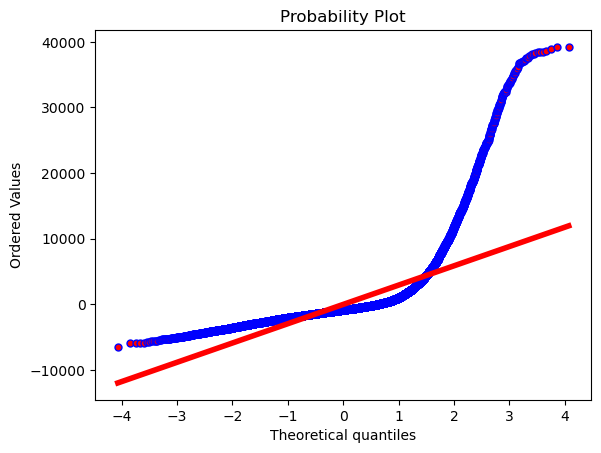

In [69]:
f , ax = plt.subplots(1,1)

stats.probplot(model_base_transformed.resid , plot = plt)
ax.get_lines()[0].set_marker('o')
ax.get_lines()[0].set_markersize(5.0)
ax.get_lines()[0].set_markerfacecolor('r')
ax.get_lines()[1].set_linewidth(4.0)
plt.show()

* From this plot, we can infer that the residuals do not come from a normal distribution. This is possible since our target variable is not normally distributed.

### Sklearn Models

#### Feature Selection using RFE

##### Train test split

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 

In [71]:
lr_base = LinearRegression()
lr_base.fit(xtrain_trans , ytrain_trans)

LinearRegression()

In [72]:
# Cross validation 
cvs_lr = cross_val_score(lr_base , x_trans , y_trans, cv=5)
cvs_lr.mean()

0.03766407245872461

* To improve this model we are proceeding with feature selection using SFS(sequential feature selector).

##### Selecting best features from whole transformed data

In [73]:
from sklearn.feature_selection import RFE , SequentialFeatureSelector as sfs1
from mlxtend.feature_selection import SequentialFeatureSelector as sfs2

In [74]:
sfs_full = sfs2(estimator=lr_base ,k_features= 'best' ,forward= False , cv=5  )
sfs_full.fit(xtrain_trans , ytrain_trans)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 60), scoring='r2')

In [75]:
best_fea = list(sfs_full.k_feature_names_)
best_fea

['timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'num_hrefs',
 'num_self_hrefs',
 'num_videos',
 'average_token_length',
 'lifestyle',
 'entertainment',
 'bus',
 'world',
 'kw_min_min',
 'kw_max_min',
 'kw_min_max',
 'bk_avg',
 'kw_min_avg',
 'kw_max_avg',
 'ak_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'monday',
 'friday',
 'LDA_00',
 'global_subjectivity',
 'min_positive_polarity',
 'title_subjectivity',
 'abs_title_subjectivity',
 'is_weekday']

* The above mentioned variables are the best features in the whole data contributing more for the model predictions.

In [76]:
# Evaluating it with a model
x_fea = df_transformed[best_fea]
y_trans = df_transformed.shares
xtrain_fea , xtest_fea , ytrain_fea , ytest_fea = train_test_split(x_fea,y_trans,test_size=0.2 , random_state=45)

In [77]:
lr_selected_features = LinearRegression()
lr_selected_features.fit(xtrain_fea , ytrain_fea)

LinearRegression()

In [78]:
ypred_best_fea_train = lr_selected_features.predict(xtrain_fea)
ypred_best_fea_test = lr_selected_features.predict(xtest_fea)

In [79]:
# Cross Validation
score_best_fea = cross_val_score(lr_selected_features , x_fea , y_trans , cv=5)
score_best_fea.mean()

0.06198843543488981

In [80]:
update_scorecard_reg('Best features from full data',ytrain_fea,ypred_best_fea_train , ytest_fea , ypred_best_fea_test)
scorecard_reg

,model_name,train_RSquare,test_RSquare,train_RMSE,test_RMSE
0,OLS Model with raw data,0.023,0.018,11763.142,10125.235
1,OLS Model with transformed data,0.075,0.071,3878.817,4010.010
2,OLS Model with significant features based on P...,0.073,0.072,3923.370,3840.948
3,OLS Model after VIF,0.062,0.057,3926.310,3957.523
4,Best features from full data,0.073,0.071,3902.072,3928.658


##### Best features in VIF based features

In [81]:
lr_vif = LinearRegression()
lr_vif.fit(xtrain_vif , ytrain_vif)

LinearRegression()

In [82]:
score_vif = cross_val_score(lr_vif , x_vif ,y_trans , cv=5 )
score_vif.mean()

0.03766407245872461

In [83]:
sfs_vif = sfs2(estimator=lr_vif ,k_features= 'best' ,forward= False , cv=5  )
sfs_vif.fit(xtrain_vif , ytrain_vif)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 36), scoring='r2')

In [84]:
select_fea_vif = list(sfs_vif.k_feature_names_)
select_fea_vif

['num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'lifestyle',
 'entertainment',
 'bus',
 'tech',
 'world',
 'kw_min_min',
 'kw_max_max',
 'kw_max_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'tuesday',
 'wednesday',
 'thursday',
 'saturday',
 'sunday',
 'LDA_00',
 'LDA_02',
 'global_rate_negative_words',
 'title_subjectivity',
 'title_sentiment_polarity']

In [85]:
x_fea_vif= df_transformed[select_fea_vif]
y_trans = df_transformed.shares
xtrain_fea_vif , xtest_fea_vif , ytrain_fea_vif , ytest_fea_vif = train_test_split(x_fea_vif,y_trans,test_size=0.2 , random_state=45)

In [86]:
lr_best_fea_vif = LinearRegression()
lr_best_fea_vif.fit(xtrain_fea_vif , ytrain_fea_vif)

LinearRegression()

In [87]:
ypred_best_fea_vif_train = lr_best_fea_vif.predict(xtrain_fea_vif)
ypred_best_fea_vif_test = lr_best_fea_vif.predict(xtest_fea_vif)

In [88]:
# Cross validation
score_best_fea_vif = cross_val_score(lr_best_fea_vif , x_fea_vif , y_trans , cv=5)
score_best_fea_vif.mean()

0.038753632950971874

In [89]:
update_scorecard_reg('Best features after vif',ytrain_fea_vif, ypred_best_fea_vif_train , ytest_fea_vif , ypred_best_fea_vif_test)
scorecard_reg

,model_name,train_RSquare,test_RSquare,train_RMSE,test_RMSE
0,OLS Model with raw data,0.023,0.018,11763.142,10125.235
1,OLS Model with transformed data,0.075,0.071,3878.817,4010.010
2,OLS Model with significant features based on P...,0.073,0.072,3923.370,3840.948
3,OLS Model after VIF,0.062,0.057,3926.310,3957.523
4,Best features from full data,0.073,0.071,3902.072,3928.658
5,Best features after vif,0.062,0.057,3926.777,3958.617


#### Polynomial Regression

In [90]:
from sklearn.preprocessing import PolynomialFeatures

##### Polynomial Regression with full data

In [91]:
pf = PolynomialFeatures(degree= 2)
x_poly = pf.fit_transform(x_trans)

In [92]:
xtrain_poly,xtest_poly,ytrain_poly,ytest_poly = train_test_split(x_poly,y_trans,test_size=0.2,random_state=55)

In [93]:
lr_poly = LinearRegression()
lr_poly.fit(xtrain_poly , ytrain_poly)

LinearRegression()

In [94]:
ypred_poly_train = lr_poly.predict(xtrain_poly)
ypred_poly_test = lr_poly.predict(xtest_poly)

In [95]:
update_scorecard_reg('Polynomial regression on full model',ytrain_poly,ypred_poly_train , ytest_poly , ypred_poly_test)
scorecard_reg

,model_name,train_RSquare,test_RSquare,train_RMSE,test_RMSE
0,OLS Model with raw data,0.023,0.018,11763.142,10125.235
1,OLS Model with transformed data,0.075,0.071,3878.817,4010.010
2,OLS Model with significant features based on P...,0.073,0.072,3923.370,3840.948
3,OLS Model after VIF,0.062,0.057,3926.310,3957.523
4,Best features from full data,0.073,0.071,3902.072,3928.658
5,Best features after vif,0.062,0.057,3926.777,3958.617
6,Polynomial regression on full model,0.106,0.045,3811.343,4065.344


##### Polynomial Regression from selected features of full data

In [96]:
pf = PolynomialFeatures(degree= 2)
x_poly_fea = pf.fit_transform(x_fea)
xtrain_poly_fea,xtest_poly_fea,ytrain_poly_fea,ytest_poly_fea = train_test_split(x_poly_fea,y_trans,test_size=0.2,random_state=55)

In [97]:
lr_poly_fea = LinearRegression()
lr_poly_fea.fit(xtrain_poly_fea , ytrain_poly_fea)

LinearRegression()

In [98]:
ypred_poly_fea_train = lr_poly_fea.predict(xtrain_poly_fea)
ypred_poly_fea_test = lr_poly_fea.predict(xtest_poly_fea)

In [99]:
update_scorecard_reg('Polynomial regression on best features from full model',ytrain_poly_fea,ypred_poly_fea_train , ytest_poly_fea , ypred_poly_fea_test)
scorecard_reg

,model_name,train_RSquare,test_RSquare,train_RMSE,test_RMSE
0,OLS Model with raw data,0.023,0.018,11763.142,10125.235
1,OLS Model with transformed data,0.075,0.071,3878.817,4010.010
2,OLS Model with significant features based on P...,0.073,0.072,3923.370,3840.948
3,OLS Model after VIF,0.062,0.057,3926.310,3957.523
4,Best features from full data,0.073,0.071,3902.072,3928.658
5,Best features after vif,0.062,0.057,3926.777,3958.617
6,Polynomial regression on full model,0.106,0.045,3811.343,4065.344
7,Polynomial regression on best features from fu...,0.105,0.063,3814.092,4028.292


##### Polynomial Regression from selected features of vif

In [100]:
pf = PolynomialFeatures(degree= 2)
x_poly_fea_vif = pf.fit_transform(x_fea_vif)
xtrain_poly_fea_vif, xtest_poly_fea_vif, ytrain_poly_fea_vif ,ytest_poly_fea_vif = train_test_split(x_poly_fea_vif,y_trans,test_size=0.2,random_state=55)

In [101]:
lr_poly_fea_vif = LinearRegression()
lr_poly_fea_vif.fit(xtrain_poly_fea_vif , ytrain_poly_fea_vif)

LinearRegression()

In [102]:
ypred_poly_fea_vif_train = lr_poly_fea_vif.predict(xtrain_poly_fea_vif)
ypred_poly_fea_vif_test = lr_poly_fea_vif.predict(xtest_poly_fea_vif)

In [103]:
update_scorecard_reg('Polynomial on best features from VIF',ytrain_poly_fea_vif,ypred_poly_fea_train , ytest_poly_fea_vif , ypred_poly_fea_vif_test)

In [104]:
scorecard_reg

,model_name,train_RSquare,test_RSquare,train_RMSE,test_RMSE
0,OLS Model with raw data,0.023,0.018,11763.142,10125.235
1,OLS Model with transformed data,0.075,0.071,3878.817,4010.010
2,OLS Model with significant features based on P...,0.073,0.072,3923.370,3840.948
3,OLS Model after VIF,0.062,0.057,3926.310,3957.523
4,Best features from full data,0.073,0.071,3902.072,3928.658
5,Best features after vif,0.062,0.057,3926.777,3958.617
6,Polynomial regression on full model,0.106,0.045,3811.343,4065.344
7,Polynomial regression on best features from fu...,0.105,0.063,3814.092,4028.292
8,Polynomial on best features from VIF,0.105,0.059,3814.092,4036.493


* Since comparing the RSquare and RMSE of all the base models the best features selected from full model performs slightly better than others thus proceeding with this model for regularization.

#### Regularization techniques

In [105]:
from sklearn.linear_model import Lasso , Ridge , ElasticNet ,SGDRegressor
from sklearn.model_selection import RandomizedSearchCV

#### Lasso Model (Selected features from full model)

In [106]:
la = Lasso(alpha=0.5)
la.fit(xtrain_fea,ytrain_fea)

Lasso(alpha=0.5)

In [107]:
cross_val_score(la , x_fea ,y_trans ,cv=5)

array([0.0089961 , 0.07322154, 0.06498482, 0.08321325, 0.0795524 ])

In [108]:
ypred_lasso_train = la.predict(xtrain_fea)
ypred_lasso_test = la.predict(xtest_fea)

In [109]:
update_scorecard_reg('Lasso with best features',ytrain_fea,ypred_lasso_train , ytest_fea , ypred_lasso_test)
scorecard_reg

,model_name,train_RSquare,test_RSquare,train_RMSE,test_RMSE
0,OLS Model with raw data,0.023,0.018,11763.142,10125.235
1,OLS Model with transformed data,0.075,0.071,3878.817,4010.010
2,OLS Model with significant features based on P...,0.073,0.072,3923.370,3840.948
3,OLS Model after VIF,0.062,0.057,3926.310,3957.523
4,Best features from full data,0.073,0.071,3902.072,3928.658
5,Best features after vif,0.062,0.057,3926.777,3958.617
6,Polynomial regression on full model,0.106,0.045,3811.343,4065.344
7,Polynomial regression on best features from fu...,0.105,0.063,3814.092,4028.292
8,Polynomial on best features from VIF,0.105,0.059,3814.092,4036.493
9,Lasso with best features,0.073,0.071,3902.098,3928.889


#### Ridge (Selected features from full model)

In [110]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [111]:
para = {'alpha':[0.1,0.01,0.001,0.0001,1.0,10] , 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ri = Ridge()
rcv = RandomizedSearchCV(estimator=ri , param_distributions= para , cv= 3 , scoring='neg_mean_squared_error')
rcv.fit(xtrain_fea , ytrain_fea)
rcv.best_params_

{'solver': 'auto', 'alpha': 10}

In [112]:
ri = Ridge(alpha=10.0 , solver= 'auto')
ri.fit(xtrain_fea,ytrain_fea)gr

Ridge(alpha=10.0)

In [113]:
cross_val_score(ri , x_fea ,y_trans ,cv=5)

array([0.0090945 , 0.07334889, 0.06489163, 0.08323542, 0.07946523])

In [114]:
ypred_ridge_train = ri.predict(xtrain_fea)
ypred_ridge_test = ri.predict(xtest_fea)

In [115]:
update_scorecard_reg('Ridge with best features',ytrain_fea,ypred_ridge_train , ytest_fea , ypred_ridge_test)
scorecard_reg

,model_name,train_RSquare,test_RSquare,train_RMSE,test_RMSE
0,OLS Model with raw data,0.023,0.018,11763.142,10125.235
1,OLS Model with transformed data,0.075,0.071,3878.817,4010.010
2,OLS Model with significant features based on P...,0.073,0.072,3923.370,3840.948
3,OLS Model after VIF,0.062,0.057,3926.310,3957.523
4,Best features from full data,0.073,0.071,3902.072,3928.658
5,Best features after vif,0.062,0.057,3926.777,3958.617
6,Polynomial regression on full model,0.106,0.045,3811.343,4065.344
7,Polynomial regression on best features from fu...,0.105,0.063,3814.092,4028.292
8,Polynomial on best features from VIF,0.105,0.059,3814.092,4036.493
9,Lasso with best features,0.073,0.071,3902.098,3928.889


#### Elasticnet (Selected features from full model)

In [116]:
enet = ElasticNet(alpha = 10)
enet.fit(xtrain_fea,ytrain_fea)

ElasticNet(alpha=10)

In [117]:
ypred_enet_train = enet.predict(xtrain_fea)
ypred_enet_test = enet.predict(xtest_fea)

In [118]:
update_scorecard_reg('Elasticnet with best features',ytrain_fea, ypred_enet_train , ytest_fea , ypred_enet_test)
scorecard_reg

,model_name,train_RSquare,test_RSquare,train_RMSE,test_RMSE
0,OLS Model with raw data,0.023,0.018,11763.142,10125.235
1,OLS Model with transformed data,0.075,0.071,3878.817,4010.010
2,OLS Model with significant features based on P...,0.073,0.072,3923.370,3840.948
3,OLS Model after VIF,0.062,0.057,3926.310,3957.523
4,Best features from full data,0.073,0.071,3902.072,3928.658
5,Best features after vif,0.062,0.057,3926.777,3958.617
6,Polynomial regression on full model,0.106,0.045,3811.343,4065.344
7,Polynomial regression on best features from fu...,0.105,0.063,3814.092,4028.292
8,Polynomial on best features from VIF,0.105,0.059,3814.092,4036.493
9,Lasso with best features,0.073,0.071,3902.098,3928.889


* Since after trying many regularization techniques there seems to be no much improvement in the model thus we are going to try some non linear models for improving the accuracy.

#### Non Linear Models

#### Decision Tree Regressor

In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

In [120]:
para = {'max_depth': np.arange(2, 10),
    'min_samples_split': np.arange(2, 12),
    'min_samples_leaf': np.arange(2, 11),
    'max_features': ['auto', 'sqrt', 'log2']}
dt = DecisionTreeRegressor()
rcv = RandomizedSearchCV(estimator=dt , param_distributions= para , cv= 3 , scoring='neg_mean_squared_error')
rcv.fit(xtrain_fea , ytrain_fea)
rcv.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 3}

In [122]:
dt = DecisionTreeRegressor(max_depth=3 ,max_features='auto',min_samples_leaf=10 , min_samples_split=3 , random_state=85)
dt.fit(xtrain_fea , ytrain_fea)

DecisionTreeRegressor(max_depth=3, max_features='auto', min_samples_leaf=10,
                      min_samples_split=3, random_state=85)

In [123]:
cross_val_score(dt , x_fea ,y_trans ,cv=5)

array([-0.01018004,  0.05543121,  0.03151018,  0.05396041,  0.0539555 ])

In [124]:
ypred_dt_train = dt.predict(xtrain_fea)
ypred_dt_test = dt.predict(xtest_fea)

In [125]:
update_scorecard_reg('Decision tree regressor ',ytrain_fea, ypred_dt_train , ytest_fea , ypred_dt_test)
scorecard_reg

,model_name,train_RSquare,test_RSquare,train_RMSE,test_RMSE
0,OLS Model with raw data,0.023,0.018,11763.142,10125.235
1,OLS Model with transformed data,0.075,0.071,3878.817,4010.010
2,OLS Model with significant features based on P...,0.073,0.072,3923.370,3840.948
3,OLS Model after VIF,0.062,0.057,3926.310,3957.523
4,Best features from full data,0.073,0.071,3902.072,3928.658
5,Best features after vif,0.062,0.057,3926.777,3958.617
6,Polynomial regression on full model,0.106,0.045,3811.343,4065.344
7,Polynomial regression on best features from fu...,0.105,0.063,3814.092,4028.292
8,Polynomial on best features from VIF,0.105,0.059,3814.092,4036.493
9,Lasso with best features,0.073,0.071,3902.098,3928.889


#### Random Forest Regressor

In [126]:
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor ,GradientBoostingRegressor

In [127]:
rt = RandomForestRegressor(random_state=45).fit(xtrain_fea , ytrain_fea)

In [128]:
ypred_rt_train = rt.predict(xtrain_fea)
ypred_rt_test = rt.predict(xtest_fea)

In [132]:
update_scorecard_reg('Random Forest regressor',ytrain_fea, ypred_rt_train  , ytest_fea , ypred_rt_test)
scorecard_reg

,model_name,train_RSquare,test_RSquare,train_RMSE,test_RMSE
0,OLS Model with raw data,0.023,0.018,11763.142,10125.235
1,OLS Model with transformed data,0.075,0.071,3878.817,4010.010
2,OLS Model with significant features based on P...,0.073,0.072,3923.370,3840.948
3,OLS Model after VIF,0.062,0.057,3926.310,3957.523
4,Best features from full data,0.073,0.071,3902.072,3928.658
5,Best features after vif,0.062,0.057,3926.777,3958.617
6,Polynomial regression on full model,0.106,0.045,3811.343,4065.344
7,Polynomial regression on best features from fu...,0.105,0.063,3814.092,4028.292
8,Polynomial on best features from VIF,0.105,0.059,3814.092,4036.493
9,Lasso with best features,0.073,0.071,3902.098,3928.889


#### ADA Boost Regressor

In [139]:
ada = AdaBoostRegressor(n_estimators=70, learning_rate=2.0, random_state=55)
ada.fit(xtrain_fea , ytrain_fea)

AdaBoostRegressor(learning_rate=2.0, n_estimators=70, random_state=55)

In [140]:
ypred_ada_train = ada.predict(xtrain_fea)
ypred_ada_test = ada.predict(xtest_fea)

In [142]:
update_scorecard_reg('ADA boost regressor',ytrain_fea, ypred_ada_train , ytest_fea , ypred_ada_test)
scorecard_reg

,model_name,train_RSquare,test_RSquare,train_RMSE,test_RMSE
0,OLS Model with raw data,0.023,0.018,11763.142,10125.235
1,OLS Model with transformed data,0.075,0.071,3878.817,4010.010
2,OLS Model with significant features based on P...,0.073,0.072,3923.370,3840.948
3,OLS Model after VIF,0.062,0.057,3926.310,3957.523
4,Best features from full data,0.073,0.071,3902.072,3928.658
5,Best features after vif,0.062,0.057,3926.777,3958.617
6,Polynomial regression on full model,0.106,0.045,3811.343,4065.344
7,Polynomial regression on best features from fu...,0.105,0.063,3814.092,4028.292
8,Polynomial on best features from VIF,0.105,0.059,3814.092,4036.493
9,Lasso with best features,0.073,0.071,3902.098,3928.889


#### Gradient Boost Regressor

In [151]:
gboost = GradientBoostingRegressor(random_state=85)
gboost.fit(xtrain_fea , ytrain_fea)

GradientBoostingRegressor(random_state=85)

In [152]:
ypred_gboost_train = gboost.predict(xtrain_fea)
ypred_gboost_test = gboost.predict(xtest_fea)

In [153]:
update_scorecard_reg('Gradient Boost regressor',ytrain_fea, ypred_gboost_train , ytest_fea , ypred_gboost_test)
scorecard_reg

,model_name,train_RSquare,test_RSquare,train_RMSE,test_RMSE
0,OLS Model with raw data,0.023,0.018,11763.142,10125.235
1,OLS Model with transformed data,0.075,0.071,3878.817,4010.010
2,OLS Model with significant features based on P...,0.073,0.072,3923.370,3840.948
3,OLS Model after VIF,0.062,0.057,3926.310,3957.523
4,Best features from full data,0.073,0.071,3902.072,3928.658
5,Best features after vif,0.062,0.057,3926.777,3958.617
6,Polynomial regression on full model,0.106,0.045,3811.343,4065.344
7,Polynomial regression on best features from fu...,0.105,0.063,3814.092,4028.292
8,Polynomial on best features from VIF,0.105,0.059,3814.092,4036.493
9,Lasso with best features,0.073,0.071,3902.098,3928.889


#### XG Boost Regressor

In [154]:
from xgboost import XGBRegressor

In [165]:
xgb = XGBRegressor(random_state = 45)
xgb.fit(xtrain_fea,ytrain_fea)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=45, ...)

In [168]:
ypred_xgb_train = xgb.predict(xtrain_fea)
ypred_xgb_test = xgb.predict(xtest_fea)

In [169]:
update_scorecard_reg('XG Boost regressor ',ytrain_fea, ypred_xgb_train , ytest_fea , ypred_xgb_test)
scorecard_reg

,model_name,train_RSquare,test_RSquare,train_RMSE,test_RMSE
0,OLS Model with raw data,0.023,0.018,11763.142,10125.235
1,OLS Model with transformed data,0.075,0.071,3878.817,4010.010
2,OLS Model with significant features based on P...,0.073,0.072,3923.370,3840.948
3,OLS Model after VIF,0.062,0.057,3926.310,3957.523
4,Best features from full data,0.073,0.071,3902.072,3928.658
5,Best features after vif,0.062,0.057,3926.777,3958.617
6,Polynomial regression on full model,0.106,0.045,3811.343,4065.344
7,Polynomial regression on best features from fu...,0.105,0.063,3814.092,4028.292
8,Polynomial on best features from VIF,0.105,0.059,3814.092,4036.493
9,Lasso with best features,0.073,0.071,3902.098,3928.889


* Given that the XGBoost model achieves a training R-squared of approximately 60%, we are currently exploring hyperparameter tuning techniques to alleviate overfitting concerns and enhance overall model performance.

#### XG Boost Hypertuned

In [170]:
para = {'n_estimators': np.arange(50,150,10), 'max_depth': np.arange(2,10),
        'learning_rate': [1.0,10,0.1,0.01,0.001,0.0001], 'gamma': np.arange(1,10) }

xgb_cv = RandomizedSearchCV(estimator=XGBRegressor(),param_distributions= para ,cv= 5).fit(xtrain_fea , ytrain_fea)

xgb_cv.best_params_

{'n_estimators': 90, 'max_depth': 8, 'learning_rate': 0.01, 'gamma': 2}

In [171]:
xgbr_gs = XGBRegressor(n_estimators = 90, max_depth = 8 , learning_rate = 0.01 , gamma = 2 , random_state = 66)
xgbr_gs.fit(xtrain_fea , ytrain_fea)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=90, n_jobs=None,
             num_parallel_tree=None, random_state=66, ...)

In [174]:
ypred_xgbr_gs_train = xgbr_gs.predict(xtrain_fea)
ypred_xgbr_gs_test = xgbr_gs.predict(xtest_fea)

In [175]:
update_scorecard_reg('XG Boost regressor - tunned ',ytrain_fea, ypred_xgbr_gs_train , ytest_fea , ypred_xgbr_gs_test)
scorecard_reg

,model_name,train_RSquare,test_RSquare,train_RMSE,test_RMSE
0,OLS Model with raw data,0.023,0.018,11763.142,10125.235
1,OLS Model with transformed data,0.075,0.071,3878.817,4010.010
2,OLS Model with significant features based on P...,0.073,0.072,3923.370,3840.948
3,OLS Model after VIF,0.062,0.057,3926.310,3957.523
4,Best features from full data,0.073,0.071,3902.072,3928.658
5,Best features after vif,0.062,0.057,3926.777,3958.617
6,Polynomial regression on full model,0.106,0.045,3811.343,4065.344
7,Polynomial regression on best features from fu...,0.105,0.063,3814.092,4028.292
8,Polynomial on best features from VIF,0.105,0.059,3814.092,4036.493
9,Lasso with best features,0.073,0.071,3902.098,3928.889


* After hyperparameter tuning, although we managed to reduce overfitting as evidenced by a smaller difference between the training and test R-squared values compared to the base XGBoost model, the overall performance of the model did not improve significantly. This is because both the training and test R-squared values remain very low.
* And apart from XGBoost the train and test R-squared values are comparatively very low for each and every models in the regression scorecard, it confirms that proceeding with regression analysis might not be suitable.
* Hence, we are opting to transform our continuous target variable into categorical values and explore the development of classification models.
* This shift aims to better capture the underlying patterns in our data and improve model performance.

### Discretization

Since regression models have shown poor performance, we're transitioning to a different approach by converting our target variable into categorical groups. This process, known as discretization, involves dividing our numerical target variable into distinct categories. We aim to use classification models to improve the accuracy of our predictions.

In [176]:
from sklearn.preprocessing import KBinsDiscretizer

In [180]:
# Reshape the 'shares' Series into a 2D array
shares_array = np.array(df_transformed['shares']).reshape(-1, 1)

# Create the KBinsDiscretizer object
bin_discretizer = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='quantile')

# Fit the binning transformer on the 'shares' data
bin_discretizer.fit(shares_array)

# Transform the 'shares' data into bins
shares_binned = bin_discretizer.transform(shares_array)

# Extract the bin labels
bin_labels = shares_binned.astype(int).flatten()


In [181]:
df_transformed.reset_index(drop=True, inplace=True)
df_transformed['popularity'] = pd.Series(bin_labels)

In [182]:
df_transformed.popularity.value_counts()

1    19320
0    17490
Name: popularity, dtype: int64

<Axes: ylabel='popularity'>

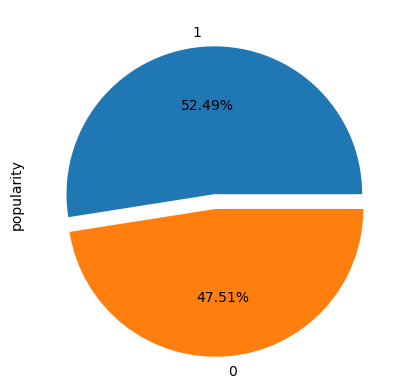

In [183]:
df_transformed.popularity.value_counts().plot(kind = 'pie' , autopct = '%.2f%%' , explode = [0,0.1])

* KBinsDiscretizer is a preprocessing transformer provided by scikit-learn for binning (or discretizing) continuous features into discrete intervals. 
* split the target variable into 2 bins using quantile statergy and ordinal encoding.
* Thus, the class 0 consist of 17490 observations and class 1 consist of 19320 observations.
* The target classes are balanced. 

#### Analysing the bins

In [184]:
df_transformed['shares'][df_transformed['popularity'] == 0].describe()

count    17490.000000
mean       908.656832
std        253.816354
min          1.000000
25%        736.000000
50%        920.000000
75%       1100.000000
max       1300.000000
Name: shares, dtype: float64

In [185]:
df_transformed['shares'][df_transformed['popularity'] == 1].describe()

count    19320.000000
mean      4388.985404
std       5056.174143
min       1400.000000
25%       1800.000000
50%       2600.000000
75%       4600.000000
max      42500.000000
Name: shares, dtype: float64

* Upon analyzing each class, it's observed that Class 0 primarily comprises articles with up to 1300 shares, while Class 1 consists of articles with more than 1300 shares. 
* Therefore, we can infer that Class 0 represents articles with relatively lower popularity, suggesting areas for potential improvement in order to enhance their reach. 
* On the other hand, Class 1 represents articles that are considered popular, indicating a higher level of engagement and interest among readers.

### Model Building - Classification

#### Train Test split

In [186]:
from sklearn.model_selection  import train_test_split , RandomizedSearchCV , GridSearchCV

In [187]:
x = df_transformed.drop(['shares','popularity','categories','days'],axis=1)
y = df_transformed['popularity']
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.3 ,random_state=55,stratify=y )
print('xtrain -',xtrain.shape)
print('xtest -',xtest.shape)
print('ytrain -',ytrain.shape)
print('ytest -',ytest.shape)

xtrain - (25767, 60)
xtest - (11043, 60)
ytrain - (25767,)
ytest - (11043,)


#### Scaling the data

In [189]:
from sklearn.preprocessing import StandardScaler

In [190]:
ss = StandardScaler()

for i in x.columns:
    xtrain[i] = ss.fit_transform(xtrain[[i]])
    xtest[i] = ss.transform(xtest[[i]])
    

#### Scorecard Classification

In [191]:
scorecard_class = pd.DataFrame(columns= ['model_name','train_accuracy','test_accuracy','train_f1','test_f1'])

In [192]:
from sklearn.metrics import accuracy_score , f1_score,recall_score , precision_score , roc_auc_score , roc_curve  ,confusion_matrix , classification_report

In [193]:
def update_scorecard_class(name , model):
    global scorecard_class
    
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    
    
    
    scorecard_class = scorecard_class.append({'model_name':name, 
                                              'train_accuracy': accuracy_score(ytrain , pred_train),
                                              'test_accuracy': accuracy_score(ytest , pred_test),
                                              'train_f1': f1_score(ytrain , pred_train),
                                              'test_f1': f1_score(ytest , pred_test)},ignore_index = True)
    
    print('train report\n',classification_report(ytrain,pred_train))
    print('test report\n',classification_report(ytest,pred_test))

#### Logistic Regression

In [194]:
from sklearn.linear_model import LogisticRegression

In [195]:
# Linear - Base model
lr = LogisticRegression()
lr.fit(xtrain , ytrain)

LogisticRegression()

In [196]:
update_scorecard_class('Linear - Base',lr)

train report
               precision    recall  f1-score   support

           0       0.65      0.64      0.65     12243
           1       0.68      0.69      0.69     13524

    accuracy                           0.67     25767
   macro avg       0.67      0.67      0.67     25767
weighted avg       0.67      0.67      0.67     25767

test report
               precision    recall  f1-score   support

           0       0.65      0.62      0.64      5247
           1       0.67      0.69      0.68      5796

    accuracy                           0.66     11043
   macro avg       0.66      0.66      0.66     11043
weighted avg       0.66      0.66      0.66     11043



In [197]:
scorecard_class

,model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Linear - Base,0.667676,0.659603,0.686348,0.681089


#### KNN Neigbours

##### KNN - Distance

In [198]:
from sklearn.neighbors import KNeighborsClassifier

In [199]:
# KNN - distance
knn = KNeighborsClassifier(weights='distance')
knn.fit(xtrain , ytrain)

KNeighborsClassifier(weights='distance')

In [200]:
update_scorecard_class('KNN - Distance based neighbours' , knn)
scorecard_class

train report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12243
           1       1.00      1.00      1.00     13524

    accuracy                           1.00     25767
   macro avg       1.00      1.00      1.00     25767
weighted avg       1.00      1.00      1.00     25767

test report
               precision    recall  f1-score   support

           0       0.59      0.61      0.60      5247
           1       0.63      0.61      0.62      5796

    accuracy                           0.61     11043
   macro avg       0.61      0.61      0.61     11043
weighted avg       0.61      0.61      0.61     11043



,model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Linear - Base,0.667676,0.659603,0.686348,0.681089
1,KNN - Distance based neighbours,1.000000,0.610432,1.000000,0.620568


##### KNN - Uniform

In [201]:
knn_uni = KNeighborsClassifier(weights='uniform')
knn_uni.fit(xtrain , ytrain)

KNeighborsClassifier()

In [202]:
update_scorecard_class('KNN - uniform based neighbours',knn_uni)
scorecard_class

train report
               precision    recall  f1-score   support

           0       0.73      0.75      0.74     12243
           1       0.77      0.75      0.76     13524

    accuracy                           0.75     25767
   macro avg       0.75      0.75      0.75     25767
weighted avg       0.75      0.75      0.75     25767

test report
               precision    recall  f1-score   support

           0       0.59      0.61      0.60      5247
           1       0.63      0.61      0.62      5796

    accuracy                           0.61     11043
   macro avg       0.61      0.61      0.61     11043
weighted avg       0.61      0.61      0.61     11043



,model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Linear - Base,0.667676,0.659603,0.686348,0.681089
1,KNN - Distance based neighbours,1.000000,0.610432,1.000000,0.620568
2,KNN - uniform based neighbours,0.749292,0.610523,0.757307,0.620757


#### Naive Bayes

##### Gaussian - Naive Bayes

In [203]:
from sklearn.naive_bayes import GaussianNB ,BernoulliNB 

In [204]:
gnb = GaussianNB()
gnb.fit(xtrain , ytrain)

GaussianNB()

In [205]:
update_scorecard_class('Naive Bayes - Gaussian',gnb)
scorecard_class

train report
               precision    recall  f1-score   support

           0       0.58      0.76      0.66     12243
           1       0.70      0.51      0.59     13524

    accuracy                           0.63     25767
   macro avg       0.64      0.63      0.62     25767
weighted avg       0.64      0.63      0.62     25767

test report
               precision    recall  f1-score   support

           0       0.58      0.75      0.65      5247
           1       0.69      0.51      0.59      5796

    accuracy                           0.62     11043
   macro avg       0.63      0.63      0.62     11043
weighted avg       0.64      0.62      0.62     11043



,model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Linear - Base,0.667676,0.659603,0.686348,0.681089
1,KNN - Distance based neighbours,1.000000,0.610432,1.000000,0.620568
2,KNN - uniform based neighbours,0.749292,0.610523,0.757307,0.620757
3,Naive Bayes - Gaussian,0.626577,0.622747,0.588311,0.587198


##### Bernoulli - Naive Bayes

In [206]:
bnb = BernoulliNB()
bnb.fit(xtrain , ytrain)

BernoulliNB()

In [207]:
update_scorecard_class('Naive Bayes - Bernoulli',bnb)
scorecard_class

train report
               precision    recall  f1-score   support

           0       0.62      0.63      0.63     12243
           1       0.66      0.66      0.66     13524

    accuracy                           0.64     25767
   macro avg       0.64      0.64      0.64     25767
weighted avg       0.64      0.64      0.64     25767

test report
               precision    recall  f1-score   support

           0       0.62      0.62      0.62      5247
           1       0.66      0.66      0.66      5796

    accuracy                           0.64     11043
   macro avg       0.64      0.64      0.64     11043
weighted avg       0.64      0.64      0.64     11043



,model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Linear - Base,0.667676,0.659603,0.686348,0.681089
1,KNN - Distance based neighbours,1.000000,0.610432,1.000000,0.620568
2,KNN - uniform based neighbours,0.749292,0.610523,0.757307,0.620757
3,Naive Bayes - Gaussian,0.626577,0.622747,0.588311,0.587198
4,Naive Bayes - Bernoulli,0.644041,0.640677,0.659666,0.659808


#### Decision tree

In [208]:
from sklearn.tree import DecisionTreeClassifier

#### Decision tree - Base

In [209]:
dt = DecisionTreeClassifier(random_state=45)
dt.fit(xtrain , ytrain)

DecisionTreeClassifier(random_state=45)

In [213]:
update_scorecard_class('Decision tree - Base',dt)
scorecard_class

train report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12243
           1       1.00      1.00      1.00     13524

    accuracy                           1.00     25767
   macro avg       1.00      1.00      1.00     25767
weighted avg       1.00      1.00      1.00     25767

test report
               precision    recall  f1-score   support

           0       0.57      0.57      0.57      5247
           1       0.61      0.60      0.61      5796

    accuracy                           0.59     11043
   macro avg       0.59      0.59      0.59     11043
weighted avg       0.59      0.59      0.59     11043



,model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Linear - Base,0.667676,0.659603,0.686348,0.681089
1,KNN - Distance based neighbours,1.000000,0.610432,1.000000,0.620568
2,KNN - uniform based neighbours,0.749292,0.610523,0.757307,0.620757
3,Naive Bayes - Gaussian,0.626577,0.622747,0.588311,0.587198
4,Naive Bayes - Bernoulli,0.644041,0.640677,0.659666,0.659808
5,Decision tree - Base,1.000000,0.588789,1.000000,0.606806


#### Random Forest - Base

In [214]:
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier

In [215]:
rt = RandomForestClassifier(random_state=55)
rt.fit(xtrain , ytrain)

RandomForestClassifier(random_state=55)

In [216]:
update_scorecard_class('Random Forest - Base',rt)
scorecard_class

train report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12243
           1       1.00      1.00      1.00     13524

    accuracy                           1.00     25767
   macro avg       1.00      1.00      1.00     25767
weighted avg       1.00      1.00      1.00     25767

test report
               precision    recall  f1-score   support

           0       0.65      0.62      0.64      5247
           1       0.67      0.70      0.69      5796

    accuracy                           0.66     11043
   macro avg       0.66      0.66      0.66     11043
weighted avg       0.66      0.66      0.66     11043



,model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Linear - Base,0.667676,0.659603,0.686348,0.681089
1,KNN - Distance based neighbours,1.000000,0.610432,1.000000,0.620568
2,KNN - uniform based neighbours,0.749292,0.610523,0.757307,0.620757
3,Naive Bayes - Gaussian,0.626577,0.622747,0.588311,0.587198
4,Naive Bayes - Bernoulli,0.644041,0.640677,0.659666,0.659808
5,Decision tree - Base,1.000000,0.588789,1.000000,0.606806
6,Random Forest - Base,1.000000,0.664493,1.000000,0.686734


#### Ada Boost - Base

In [217]:
ada = AdaBoostClassifier(random_state=45)
ada.fit(xtrain , ytrain)

AdaBoostClassifier(random_state=45)

In [218]:
update_scorecard_class('Ada Boost - Base',ada)
scorecard_class

train report
               precision    recall  f1-score   support

           0       0.66      0.64      0.65     12243
           1       0.68      0.70      0.69     13524

    accuracy                           0.67     25767
   macro avg       0.67      0.67      0.67     25767
weighted avg       0.67      0.67      0.67     25767

test report
               precision    recall  f1-score   support

           0       0.65      0.63      0.64      5247
           1       0.67      0.69      0.68      5796

    accuracy                           0.66     11043
   macro avg       0.66      0.66      0.66     11043
weighted avg       0.66      0.66      0.66     11043



,model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Linear - Base,0.667676,0.659603,0.686348,0.681089
1,KNN - Distance based neighbours,1.000000,0.610432,1.000000,0.620568
2,KNN - uniform based neighbours,0.749292,0.610523,0.757307,0.620757
3,Naive Bayes - Gaussian,0.626577,0.622747,0.588311,0.587198
4,Naive Bayes - Bernoulli,0.644041,0.640677,0.659666,0.659808
5,Decision tree - Base,1.000000,0.588789,1.000000,0.606806
6,Random Forest - Base,1.000000,0.664493,1.000000,0.686734
7,Ada Boost - Base,0.671751,0.661414,0.691043,0.682678


#### Gradient Boost 

In [219]:
gboost = GradientBoostingClassifier(random_state=78)
gboost.fit(xtrain , ytrain)

GradientBoostingClassifier(random_state=78)

In [220]:
update_scorecard_class('Gradient Boost - Base',gboost)
scorecard_class

train report
               precision    recall  f1-score   support

           0       0.69      0.66      0.67     12243
           1       0.70      0.73      0.71     13524

    accuracy                           0.69     25767
   macro avg       0.69      0.69      0.69     25767
weighted avg       0.69      0.69      0.69     25767

test report
               precision    recall  f1-score   support

           0       0.65      0.63      0.64      5247
           1       0.67      0.70      0.69      5796

    accuracy                           0.66     11043
   macro avg       0.66      0.66      0.66     11043
weighted avg       0.66      0.66      0.66     11043



,model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Linear - Base,0.667676,0.659603,0.686348,0.681089
1,KNN - Distance based neighbours,1.000000,0.610432,1.000000,0.620568
2,KNN - uniform based neighbours,0.749292,0.610523,0.757307,0.620757
3,Naive Bayes - Gaussian,0.626577,0.622747,0.588311,0.587198
4,Naive Bayes - Bernoulli,0.644041,0.640677,0.659666,0.659808
5,Decision tree - Base,1.000000,0.588789,1.000000,0.606806
6,Random Forest - Base,1.000000,0.664493,1.000000,0.686734
7,Ada Boost - Base,0.671751,0.661414,0.691043,0.682678
8,Gradient Boost - Base,0.694726,0.664856,0.714524,0.686648


#### XG Boost

In [221]:
from xgboost import XGBClassifier

In [224]:
xgb_c = XGBClassifier(random_state = 96)
xgb_c.fit(xtrain , ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=96, ...)

In [225]:
update_scorecard_class('XG Boost - Base',xgb_c)
scorecard_class

train report
               precision    recall  f1-score   support

           0       0.88      0.89      0.88     12243
           1       0.90      0.89      0.89     13524

    accuracy                           0.89     25767
   macro avg       0.89      0.89      0.89     25767
weighted avg       0.89      0.89      0.89     25767

test report
               precision    recall  f1-score   support

           0       0.64      0.63      0.64      5247
           1       0.67      0.68      0.68      5796

    accuracy                           0.66     11043
   macro avg       0.66      0.66      0.66     11043
weighted avg       0.66      0.66      0.66     11043



,model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Linear - Base,0.667676,0.659603,0.686348,0.681089
1,KNN - Distance based neighbours,1.000000,0.610432,1.000000,0.620568
2,KNN - uniform based neighbours,0.749292,0.610523,0.757307,0.620757
3,Naive Bayes - Gaussian,0.626577,0.622747,0.588311,0.587198
4,Naive Bayes - Bernoulli,0.644041,0.640677,0.659666,0.659808
5,Decision tree - Base,1.000000,0.588789,1.000000,0.606806
6,Random Forest - Base,1.000000,0.664493,1.000000,0.686734
7,Ada Boost - Base,0.671751,0.661414,0.691043,0.682678
8,Gradient Boost - Base,0.694726,0.664856,0.714524,0.686648
9,XG Boost - Base,0.888307,0.658426,0.893019,0.677441


In [ ]:
* Since 

#### Decision tree - Hypertuned

In [229]:
para = {'criterion':['entropy','gini'],'max_depth':np.arange(2,22),'min_samples_split':np.arange(3,22)}
dt = DecisionTreeClassifier(random_state=55)
dt_cv = RandomizedSearchCV(estimator=dt , param_distributions=para , cv=5 , scoring='accuracy')
dt_cv.fit(xtrain , ytrain)
dt_cv.best_params_

{'min_samples_split': 10, 'max_depth': 6, 'criterion': 'entropy'}

In [230]:
dt_gs = DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_split=10,random_state=45)
dt_gs.fit(xtrain , ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=10,
                       random_state=45)

In [231]:
update_scorecard_class('Decision tree - Hypertuned',dt_gs)
scorecard_class

train report
               precision    recall  f1-score   support

           0       0.64      0.66      0.65     12243
           1       0.68      0.66      0.67     13524

    accuracy                           0.66     25767
   macro avg       0.66      0.66      0.66     25767
weighted avg       0.66      0.66      0.66     25767

test report
               precision    recall  f1-score   support

           0       0.61      0.63      0.62      5247
           1       0.66      0.64      0.65      5796

    accuracy                           0.64     11043
   macro avg       0.64      0.64      0.64     11043
weighted avg       0.64      0.64      0.64     11043



,model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Linear - Base,0.667676,0.659603,0.686348,0.681089
1,KNN - Distance based neighbours,1.000000,0.610432,1.000000,0.620568
2,KNN - uniform based neighbours,0.749292,0.610523,0.757307,0.620757
3,Naive Bayes - Gaussian,0.626577,0.622747,0.588311,0.587198
4,Naive Bayes - Bernoulli,0.644041,0.640677,0.659666,0.659808
5,Decision tree - Base,1.000000,0.588789,1.000000,0.606806
6,Random Forest - Base,1.000000,0.664493,1.000000,0.686734
7,Ada Boost - Base,0.671751,0.661414,0.691043,0.682678
8,Gradient Boost - Base,0.694726,0.664856,0.714524,0.686648
9,XG Boost - Base,0.888307,0.658426,0.893019,0.677441


#### Random Forest - Hypertuned

In [232]:
param_grid = { 'n_estimators': np.arange(100,150,10),'max_depth': np.arange(2,10), 
              'min_samples_split': np.arange(10,25), 'min_samples_leaf': np.arange(2,6)}

rt = RandomForestClassifier(random_state=85)

rt_cv = RandomizedSearchCV(estimator=rt , param_distributions=param_grid , cv=5 , scoring='accuracy')

rt_cv.fit(xtrain , ytrain)

rt_cv.best_params_

{'n_estimators': 120,
 'min_samples_split': 11,
 'min_samples_leaf': 5,
 'max_depth': 9}

In [234]:
rt_gs = RandomForestClassifier(n_estimators=120 ,max_depth=9 , min_samples_split=11, min_samples_leaf=5,random_state=55)
rt_gs.fit(xtrain , ytrain)

RandomForestClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=11,
                       n_estimators=120, random_state=55)

In [235]:
update_scorecard_class('Random Forest - Hypertuned',rt_gs)
scorecard_class

train report
               precision    recall  f1-score   support

           0       0.74      0.68      0.71     12243
           1       0.73      0.78      0.75     13524

    accuracy                           0.73     25767
   macro avg       0.73      0.73      0.73     25767
weighted avg       0.73      0.73      0.73     25767

test report
               precision    recall  f1-score   support

           0       0.66      0.60      0.63      5247
           1       0.67      0.73      0.69      5796

    accuracy                           0.66     11043
   macro avg       0.66      0.66      0.66     11043
weighted avg       0.66      0.66      0.66     11043



,model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Linear - Base,0.667676,0.659603,0.686348,0.681089
1,KNN - Distance based neighbours,1.000000,0.610432,1.000000,0.620568
2,KNN - uniform based neighbours,0.749292,0.610523,0.757307,0.620757
3,Naive Bayes - Gaussian,0.626577,0.622747,0.588311,0.587198
4,Naive Bayes - Bernoulli,0.644041,0.640677,0.659666,0.659808
5,Decision tree - Base,1.000000,0.588789,1.000000,0.606806
6,Random Forest - Base,1.000000,0.664493,1.000000,0.686734
7,Ada Boost - Base,0.671751,0.661414,0.691043,0.682678
8,Gradient Boost - Base,0.694726,0.664856,0.714524,0.686648
9,XG Boost - Base,0.888307,0.658426,0.893019,0.677441


#### Ada Boost - Hypertuned

In [236]:
para = {'n_estimators':np.arange(50,150,10) , 'learning_rate':[1.0,0.1,0.01,0.001,0.0001,10,0.000001]}
ada_cv = RandomizedSearchCV(estimator=ada ,param_distributions=para , cv=5 , scoring='accuracy' )
ada_cv.fit(xtrain , ytrain)
ada_cv.best_params_

{'n_estimators': 140, 'learning_rate': 1.0}

In [237]:
ada_gs = AdaBoostClassifier(n_estimators=140 , learning_rate=1.0 , random_state=85)
ada_gs.fit(xtrain , ytrain)

AdaBoostClassifier(n_estimators=140, random_state=85)

In [238]:
update_scorecard_class('Ada Boost - Hypertuned',ada_gs)
scorecard_class

train report
               precision    recall  f1-score   support

           0       0.68      0.65      0.67     12243
           1       0.70      0.72      0.71     13524

    accuracy                           0.69     25767
   macro avg       0.69      0.69      0.69     25767
weighted avg       0.69      0.69      0.69     25767

test report
               precision    recall  f1-score   support

           0       0.65      0.63      0.64      5247
           1       0.68      0.70      0.69      5796

    accuracy                           0.67     11043
   macro avg       0.66      0.66      0.66     11043
weighted avg       0.67      0.67      0.67     11043



,model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Linear - Base,0.667676,0.659603,0.686348,0.681089
1,KNN - Distance based neighbours,1.000000,0.610432,1.000000,0.620568
2,KNN - uniform based neighbours,0.749292,0.610523,0.757307,0.620757
3,Naive Bayes - Gaussian,0.626577,0.622747,0.588311,0.587198
4,Naive Bayes - Bernoulli,0.644041,0.640677,0.659666,0.659808
5,Decision tree - Base,1.000000,0.588789,1.000000,0.606806
6,Random Forest - Base,1.000000,0.664493,1.000000,0.686734
7,Ada Boost - Base,0.671751,0.661414,0.691043,0.682678
8,Gradient Boost - Base,0.694726,0.664856,0.714524,0.686648
9,XG Boost - Base,0.888307,0.658426,0.893019,0.677441


#### XG Boost - Hypertuned

In [239]:
para = {'n_estimators':np.arange(50,200,10), 
        'learning_rate':[0.1,0.01,0.001,0.0001,1.0,10], 
        'gamma': np.arange(2,13),
        'max_depth': np.arange(2,15)}
xgb_cv = RandomizedSearchCV(estimator=xgb ,param_distributions=para , cv=5 , scoring='accuracy' )
xgb_cv.fit(xtrain , ytrain)
xgb_cv.best_params_

{'n_estimators': 190, 'max_depth': 11, 'learning_rate': 0.1, 'gamma': 9}

In [240]:
xgb_gs = XGBClassifier(n_estimators= 190, learning_rate= 0.1, gamma= 9, max_depth=11 , random_state = 85)
xgb_gs.fit(xtrain , ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=9, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=190, n_jobs=None,
              num_parallel_tree=None, random_state=85, ...)

In [241]:
update_scorecard_class('XG Boost - Hypertuned',xgb_gs)
scorecard_class

train report
               precision    recall  f1-score   support

           0       0.74      0.71      0.72     12243
           1       0.75      0.77      0.76     13524

    accuracy                           0.74     25767
   macro avg       0.74      0.74      0.74     25767
weighted avg       0.74      0.74      0.74     25767

test report
               precision    recall  f1-score   support

           0       0.66      0.63      0.65      5247
           1       0.68      0.71      0.69      5796

    accuracy                           0.67     11043
   macro avg       0.67      0.67      0.67     11043
weighted avg       0.67      0.67      0.67     11043



,model_name,train_accuracy,test_accuracy,train_f1,test_f1
0,Linear - Base,0.667676,0.659603,0.686348,0.681089
1,KNN - Distance based neighbours,1.000000,0.610432,1.000000,0.620568
2,KNN - uniform based neighbours,0.749292,0.610523,0.757307,0.620757
3,Naive Bayes - Gaussian,0.626577,0.622747,0.588311,0.587198
4,Naive Bayes - Bernoulli,0.644041,0.640677,0.659666,0.659808
5,Decision tree - Base,1.000000,0.588789,1.000000,0.606806
6,Random Forest - Base,1.000000,0.664493,1.000000,0.686734
7,Ada Boost - Base,0.671751,0.661414,0.691043,0.682678
8,Gradient Boost - Base,0.694726,0.664856,0.714524,0.686648
9,XG Boost - Base,0.888307,0.658426,0.893019,0.677441


* From the above scorecard of classification models hypertuned XG Boost is performing good among all other models with an accuracy of 67% , f1 score of 69% and Roc-Auc score of 72%. 
* With a hypertuned XG Boost model, Mashable can accurately predict the popularity of their articles post-publication.
* This prediction capability enables them to gauge reader interest and enhance their articles accordingly.
* By identifying popular genres and topics, Mashable can release more articles tailored to reader preferences.
* This strategy can contribute to Mashable's goal of becoming a leading social media company and improving their business performance.